In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('DC_Properties_trimmed.csv')
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df.shape

(28900, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
BATHRM                28900 non-null int64
HF_BATHRM             28900 non-null int64
HEAT                  28900 non-null object
AC                    28900 non-null object
NUM_UNITS             28900 non-null int64
ROOMS                 28900 non-null int64
BEDRM                 28900 non-null int64
AYB                   28900 non-null int64
YR_RMDL               28900 non-null int64
EYB                   28900 non-null int64
STORIES               28900 non-null float64
SALEDATE              28900 non-null object
PRICE                 28900 non-null int64
QUALIFIED             28900 non-null object
SALE_NUM              28900 non-null int64
GBA                   28900 non-null int64
BLDG_NUM              28900 non-null int64
STYLE                 28900 non-null object
STRUCT                28900 non-null object
GRADE                 28900 non-null object
CNDTN                 

In [3]:
# Dropping columns X and Y, since, they are same as Latitute and Longitude columns
df.drop(columns=['X','Y'], axis=1, inplace=True)

In [4]:
data = df.copy()

In [7]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'FULLADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE',
       'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK',
       'WARD', 'SQUARE', 'QUADRANT'],
      dtype='object')

In [5]:
# Convert AC and SALEDATE columns
data.AC = np.where(data.AC=='0', 'N', data.AC)

import datetime as dt

SALE_YEAR =pd.DataFrame(pd.DatetimeIndex(data.SALEDATE).year)
SALE_YEAR

,SALEDATE
0,2003
1,2016
2,2006
3,2011
4,2018
...,...
28895,2000
28896,2000
28897,2016
28898,2017


In [6]:
data.drop(columns=['SALEDATE'], axis=1, inplace=True)

In [7]:
data = pd.concat([data,SALE_YEAR], axis=1)
data.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,SALEDATE
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,38.914680,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,NW,2003
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,38.914684,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,NW,2016
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,38.914683,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,NW,2006
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,38.915408,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,NW,2011
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,38.915017,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,NW,2018


In [11]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'QUALIFIED', 'SALE_NUM',
       'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'SOURCE', 'FULLADDRESS', 'CITY', 'STATE',
       'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE',
       'QUADRANT', 'SALEDATE'],
      dtype='object')

In [8]:
# Drop columns, which doesn't represent much

data.drop(columns=['GIS_LAST_MOD_DTTM','SOURCE', 'FULLADDRESS', 'CITY' , 'STATE', 'ASSESSMENT_SUBNBHD' , 'CENSUS_BLOCK' , 'NATIONALGRID'], axis=1, inplace=True)

In [13]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'QUALIFIED', 'SALE_NUM',
       'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'CENSUS_TRACT',
       'WARD', 'SQUARE', 'QUADRANT', 'SALEDATE'],
      dtype='object')

In [9]:
cont_df = data.select_dtypes(exclude=['object'])
cont_df.columns

continouous = ['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL',
       'EYB', 'STORIES', 'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'CENSUS_TRACT', 'SQUARE', 'SALEDATE']

categ_df = data.select_dtypes(include=['object'])
categ_df.columns

categorical = ['HEAT', 'AC', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'ASSESSMENT_NBHD',
        'WARD', 'QUADRANT']

cont_df.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,SALEDATE
0,4,0,2,8,4,1910,1988,1972,3.0,1095000,...,2,5,24,1680,20009,38.914680,-77.040832,4201,152,2003
1,3,1,2,9,5,1910,2009,1984,3.0,2100000,...,2,4,24,1680,20009,38.914684,-77.040678,4201,152,2016
2,3,1,2,8,5,1900,2003,1984,3.0,1602000,...,2,3,24,1680,20009,38.914683,-77.040629,4201,152,2006
3,3,1,2,8,4,1906,2011,1972,3.0,1050000,...,2,1,24,1627,20009,38.915408,-77.040129,4201,152,2011
4,3,1,2,7,3,1908,2008,1967,2.0,1430000,...,2,1,24,1424,20009,38.915017,-77.039903,4201,152,2018


In [15]:
cont_df.ZIPCODE.value_counts()

20002    5704
20011    2895
20003    2826
20019    2634
20001    2140
20007    1827
20015    1652
20016    1570
20010    1536
20009    1438
20020    1416
20018     940
20032     739
20017     710
20012     435
20008     250
20005      90
20024      63
20036      35
Name: ZIPCODE, dtype: int64

In [10]:
# for each categorical features print unique values:to
for column in categorical:
    print(column, data[column].unique())

HEAT ['Warm Cool' 'Hot Water Rad' 'Forced Air' 'Elec Base Brd' 'Ht Pump'
 'Wall Furnace' 'Electric Rad' 'Water Base Brd' 'No Data' 'Ind Unit'
 'Evp Cool' 'Air Exchng' 'Air-Oil' 'Gravity Furnac']
AC ['Y' 'N']
QUALIFIED ['Q' 'U']
STYLE ['3 Story' '2 Story' '4 Story' '3.5 Story Fin' '1 Story' '2.5 Story Fin'
 '1.5 Story Fin' '2.5 Story Unfin' 'Default' '3.5 Story Unfin'
 '1.5 Story Unfin' 'Split Level' 'Split Foyer' 'Vacant' '4.5 Story Fin'
 'Bi-Level' '4.5 Story Unfin']
STRUCT ['Row Inside' 'Semi-Detached' 'Single' 'Row End' 'Multi' 'Town Inside'
 'Town End' 'Default']
GRADE ['Very Good' 'Above Average' 'Good Quality' 'Excellent' 'Average'
 'Superior' 'Fair Quality' 'Exceptional-C' 'Exceptional-A' 'Exceptional-B'
 'Exceptional-D' 'No Data']
CNDTN ['Good' 'Very Good' 'Average' 'Excellent' 'Fair' 'Poor' 'Default']
EXTWALL ['Common Brick' 'Stucco' 'Stone' 'Stucco Block' 'Brick/Stone'
 'Concrete Block' 'Wood Siding' 'Brick/Siding' 'Face Brick' 'Brick/Stucco'
 'Stone Veneer' 'Vinyl Siding' 'S

In [12]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'QUALIFIED', 'SALE_NUM',
       'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'CENSUS_TRACT',
       'WARD', 'SQUARE', 'QUADRANT', 'SALEDATE'],
      dtype='object')

Text(0, 0.5, 'Frequency')

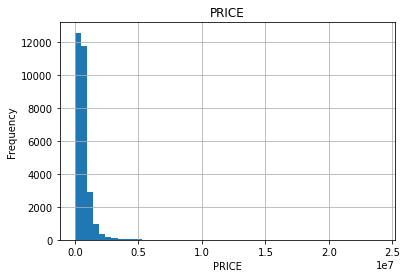

In [11]:
figure=data.PRICE.hist(bins=50)
figure.set_title('PRICE')
figure.set_xlabel('PRICE')
figure.set_ylabel('Frequency')

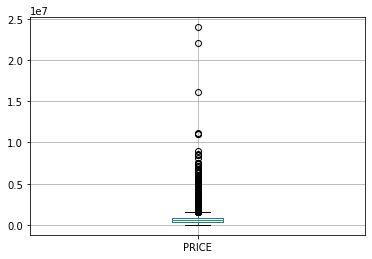

In [12]:
data.boxplot(column="PRICE")
# It can be seen that theres is a huge amount of outliers in the target column i.e., PRICE

In [19]:
data['PRICE'].describe()

count    2.890000e+04
mean     6.549323e+05
std      6.048247e+05
min      1.000000e+00
25%      3.100000e+05
50%      5.475000e+05
75%      8.100000e+05
max      2.396029e+07
Name: PRICE, dtype: float64

 It can be seen from the description of 'PRICE' column, that min PRICE is 1, 25% PRICE is- 310000, 50% PRICE is - 547500, 75% PRICE is - 810000 , max PRICE is - 23960290 i/.e., 23 million 2310000

In [13]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data.PRICE.quantile(0.75)-data.PRICE.quantile(0.25)

In [14]:
lower_bridge=data.PRICE.quantile(0.25)-(IQR*1.5)
upper_bridge=data.PRICE.quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-440000.0
1560000.0


(None, None)

But, since there are 482 rows above the upeer_bridge oulier. Let's not try deleting these rows from dataframe. Instead, Let's try unskewing the PRICE column

Skew for  PRICE 7.702667752226728


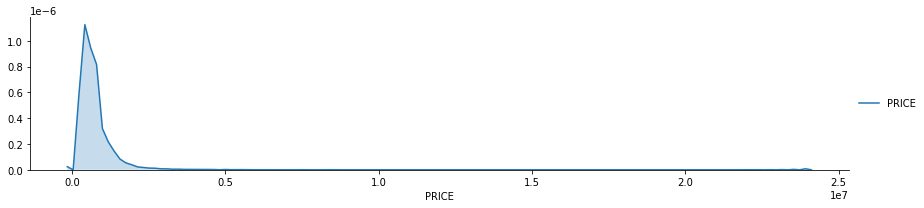

In [15]:
a = sns.FacetGrid(data, aspect=4 )
a.map(sns.kdeplot, 'PRICE', shade= True )
a.add_legend()
print('Skew for ',str('PRICE'), data['PRICE'].skew())

In [16]:
data_temp = data.copy()


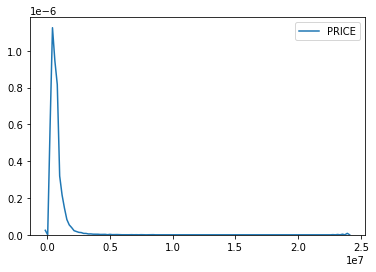

In [17]:
sns.kdeplot(data.PRICE)

In [18]:
data.PRICE.describe()

count    2.890000e+04
mean     6.549323e+05
std      6.048247e+05
min      1.000000e+00
25%      3.100000e+05
50%      5.475000e+05
75%      8.100000e+05
max      2.396029e+07
Name: PRICE, dtype: float64

Now, it can be seen that the 'PRICE' column is log normally distributed.
Let's visualize the boxplot.

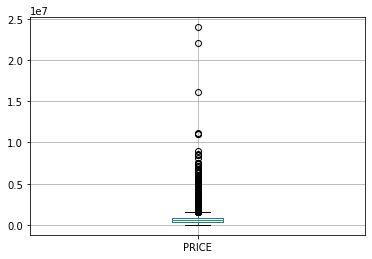

In [19]:
data_temp.boxplot(column="PRICE")

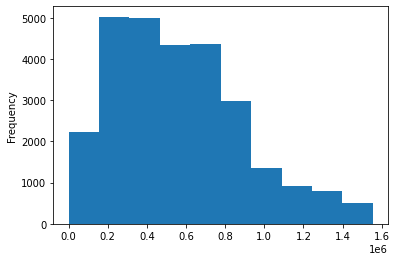

In [20]:
data.PRICE[data.PRICE<1560000].plot.hist()

In [32]:
data.shape

(28900, 36)

In [31]:
data[data.PRICE>1560000]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,QUADRANT,SALEDATE
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,1680,20009,38.914684,-77.040678,Old City 2,4201,Ward 2,152,NW,2016
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,1680,20009,38.914683,-77.040629,Old City 2,4201,Ward 2,152,NW,2006
19,3,1,Forced Air,Y,2,9,4,1890,2009,1967,...,1853,20009,38.911696,-77.032950,Old City 2,5201,Ward 2,208,NW,2015
20,3,1,Forced Air,Y,2,13,4,1800,2006,1967,...,1853,20009,38.911704,-77.032884,Old City 2,5201,Ward 2,208,NW,2018
21,3,2,Forced Air,Y,2,10,4,1800,2016,1967,...,1853,20009,38.911706,-77.032815,Old City 2,5201,Ward 2,208,NW,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,2,0,Hot Water Rad,N,1,9,4,1910,2007,1954,...,2652,20018,38.930926,-76.976443,Woodridge,9400,Ward 5,4206,NE,2005
23765,4,0,Hot Water Rad,N,4,16,8,1931,2003,1954,...,3988,20002,38.903268,-76.980271,Trinidad,8903,Ward 5,4473,NE,2018
25888,4,0,Forced Air,Y,4,16,4,1943,2002,1964,...,4116,20019,38.883795,-76.955731,Fort Dupont Park,7703,Ward 7,5440,SE,2017
25889,4,0,Forced Air,Y,4,16,4,1943,2002,1964,...,3504,20019,38.883793,-76.955864,Fort Dupont Park,7703,Ward 7,5440,SE,2017


In [34]:
data_temp = data[data.PRICE<1560000]
data_temp.shape

(27507, 36)

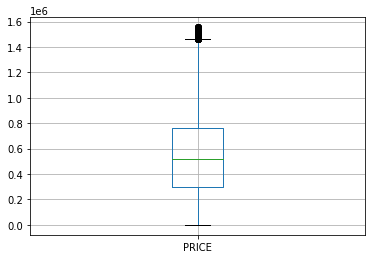

In [35]:
data_temp.boxplot(column="PRICE")

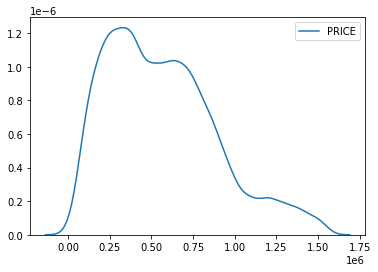

In [36]:
sns.kdeplot(data_temp.PRICE) 

From the above boxplot, it can be seen that now, PRICE has some outliers, at the higher end. 

Skew for  PRICE 0.6948836153564371


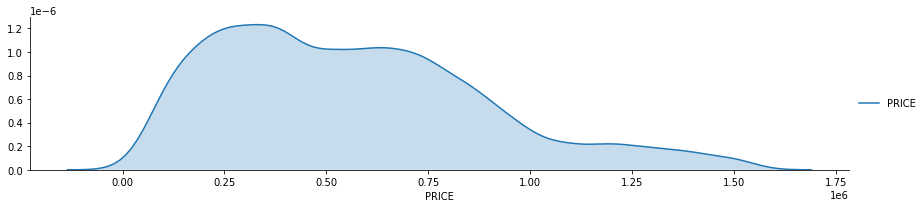

In [37]:
skewed = ['PRICE']
# # Visualize the new log distributions
for column in skewed:
    a = sns.FacetGrid(data_temp, aspect=4 )
    a.map(sns.kdeplot, column, shade= True )
    a.add_legend()
    print('Skew for ',str(column), data_temp[column].skew())

In [26]:
data_temp.select_dtypes(exclude=['object']).columns

continuous_dt_cols = ['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL',
       'EYB', 'STORIES', 'SALE_NUM', 'GBA', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'CENSUS_TRACT', 'SQUARE', 'SALEDATE']

Skew for  BATHRM 0.6275293889315856
Skew for  HF_BATHRM 0.5528780316149245
Skew for  NUM_UNITS 2.89018383370766
Skew for  ROOMS 1.7164867195269389
Skew for  BEDRM 1.4684919668150573
Skew for  AYB 0.18303333053478538
Skew for  YR_RMDL -54.285052120479115
Skew for  EYB 0.8756214600877771
Skew for  STORIES 148.2528050909236
Skew for  SALE_NUM 1.646308823946258
Skew for  GBA 1.6124250824353794
Skew for  KITCHENS 10.418635077465108
Skew for  FIREPLACES 1.7677866145509775
Skew for  USECODE 1.6272872483403062
Skew for  LANDAREA 3.571636554803603
Skew for  ZIPCODE 0.6431623017608333
Skew for  LATITUDE -0.057894934283096146
Skew for  LONGITUDE -0.17880990298937513
Skew for  CENSUS_TRACT -0.19100871951837553
Skew for  SQUARE 0.35319763501205403
Skew for  SALEDATE -0.7880742631414902


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


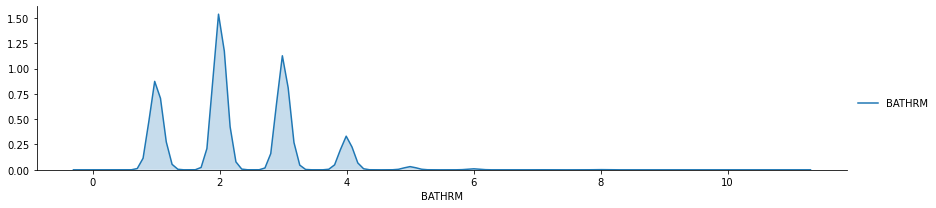

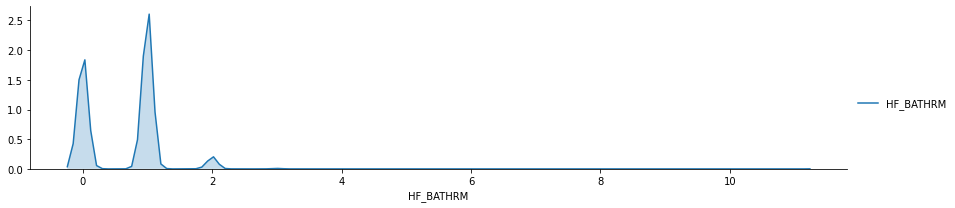

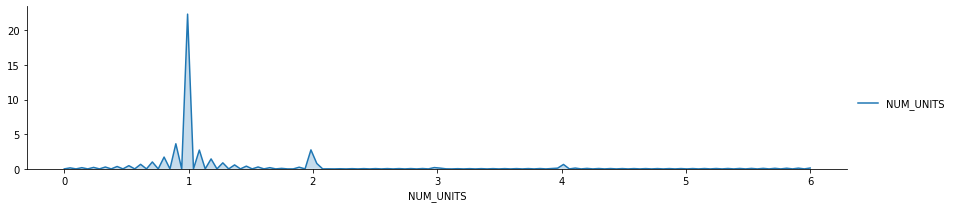

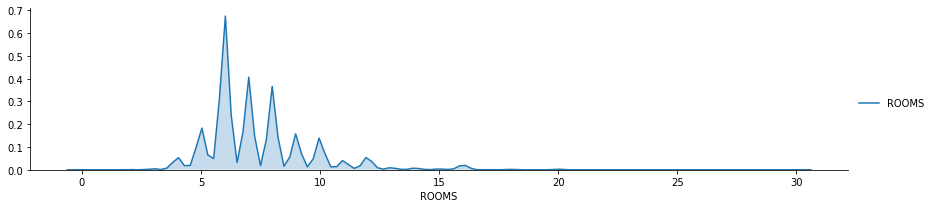

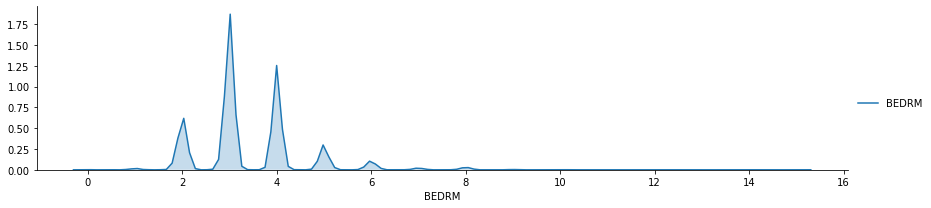

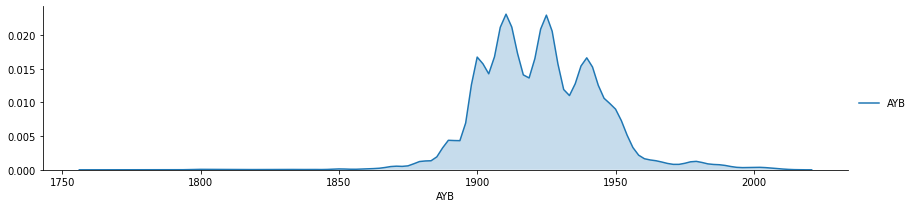

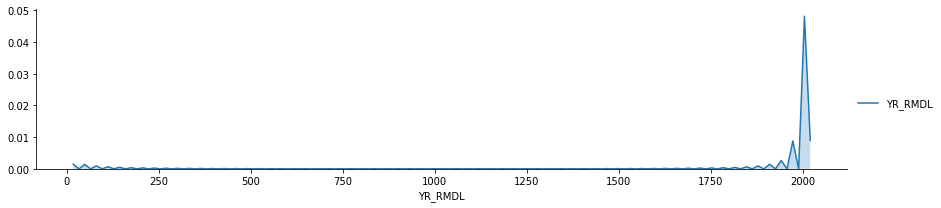

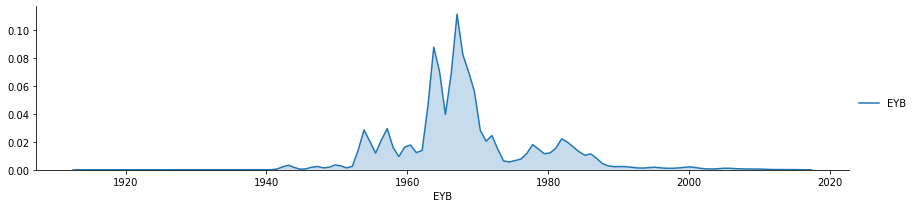

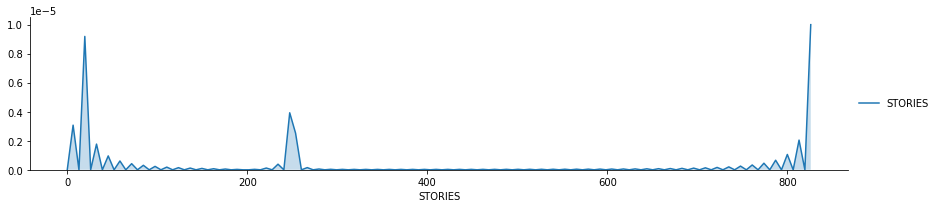

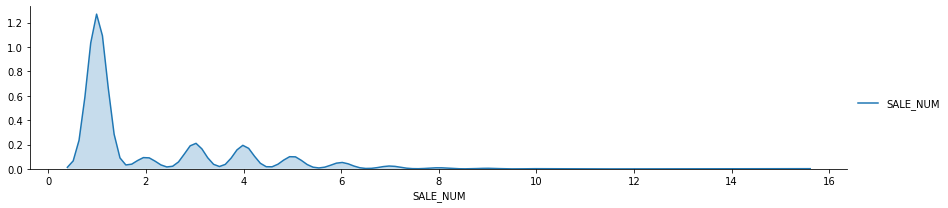

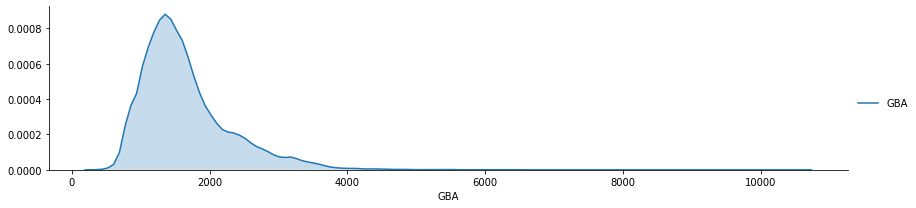

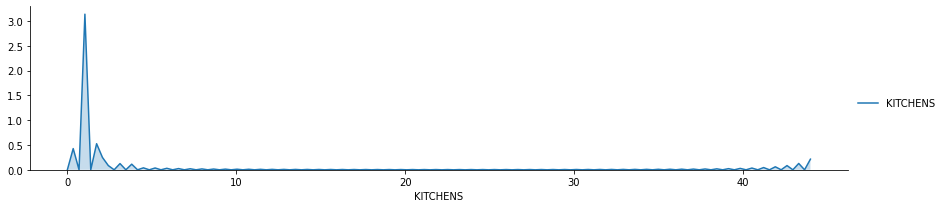

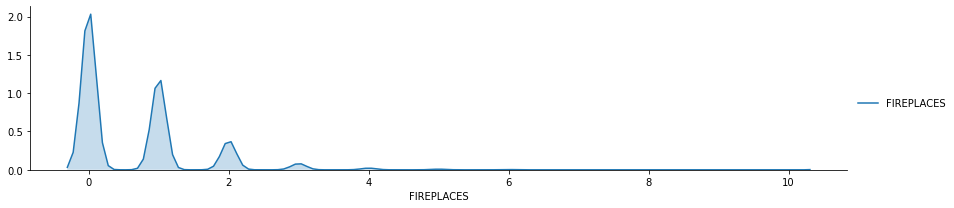

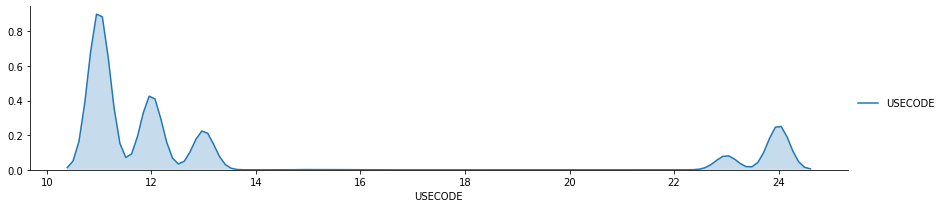

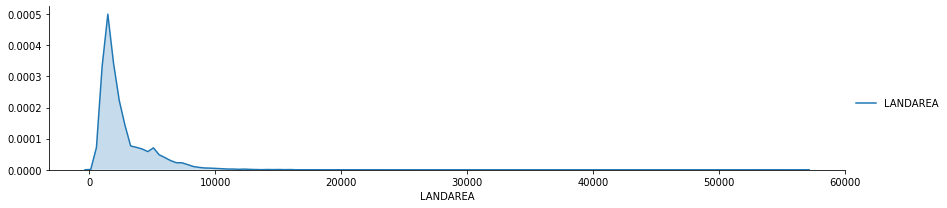

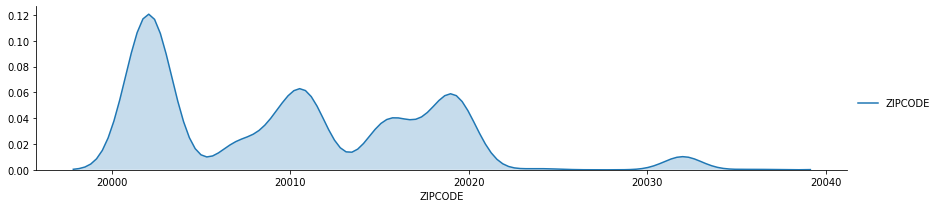

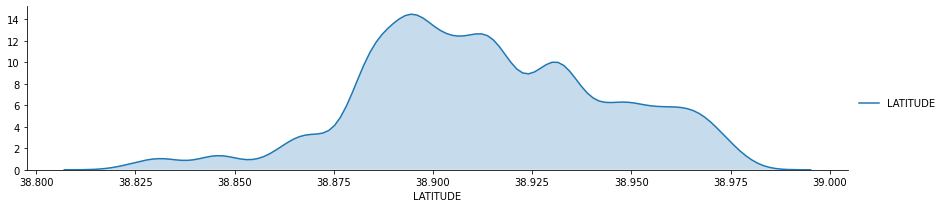

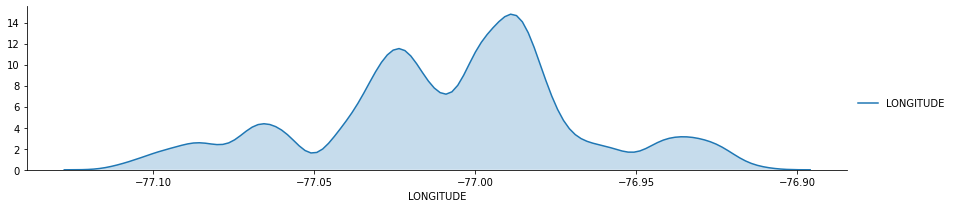

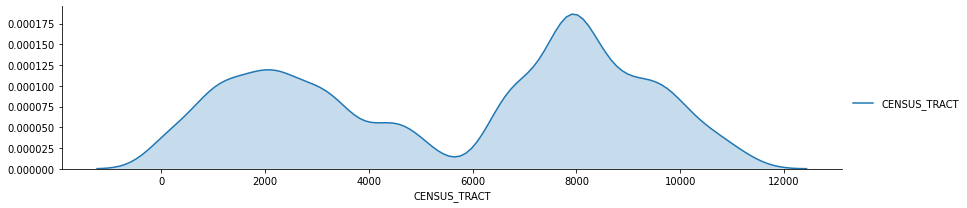

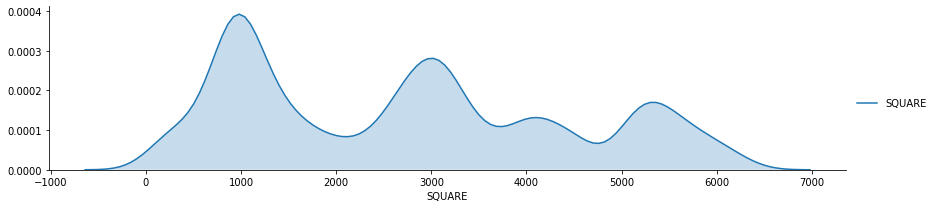

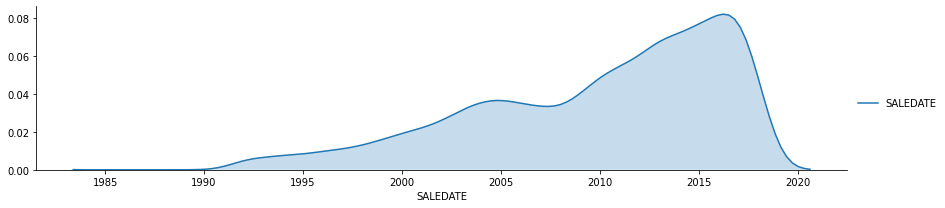

In [38]:
### Skkwness of features-

# plot disctribution and check skewness:
for column in continuous_dt_cols:
    a = sns.FacetGrid(data_temp, aspect=4 )
    a.map(sns.kdeplot, column, shade= True )
    a.add_legend()
    print('Skew for ',str(column), data_temp[column].skew())

In [39]:
data_temp.drop(columns=['BLDG_NUM'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


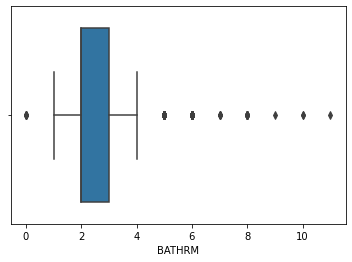

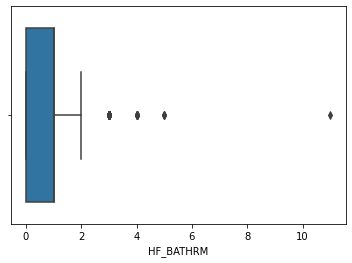

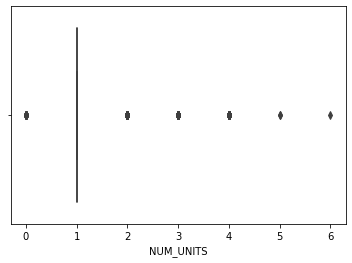

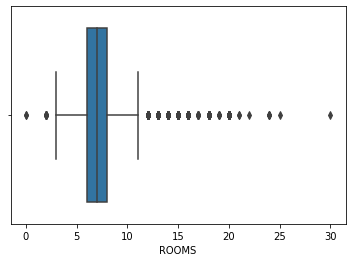

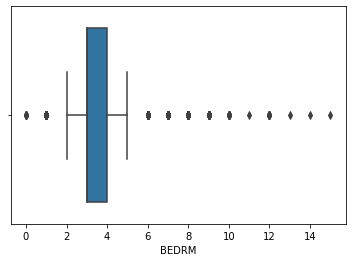

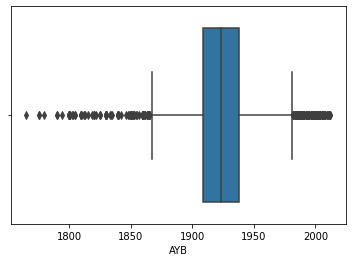

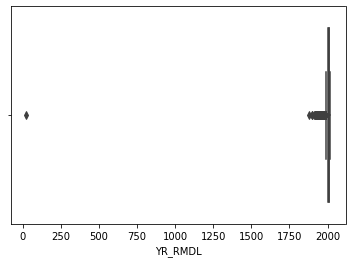

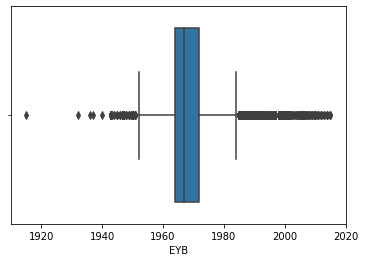

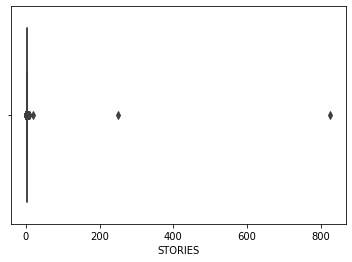

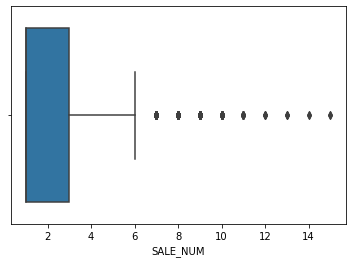

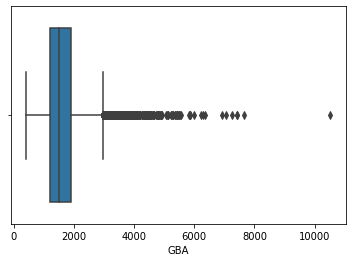

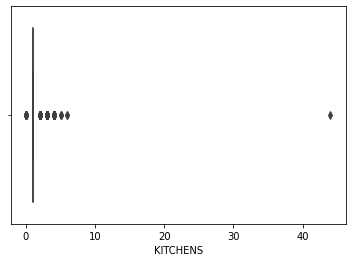

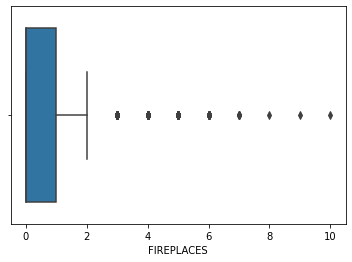

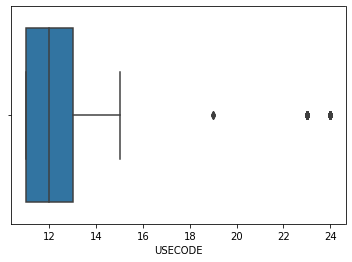

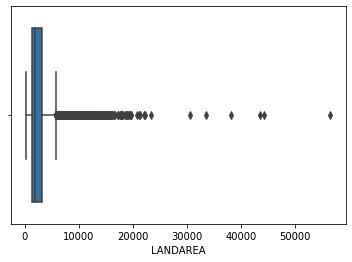

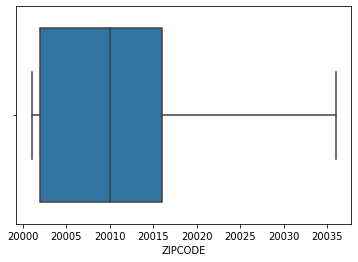

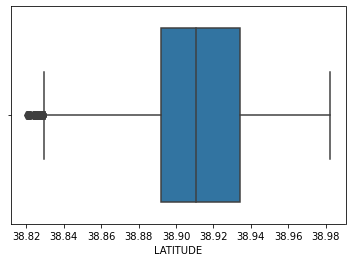

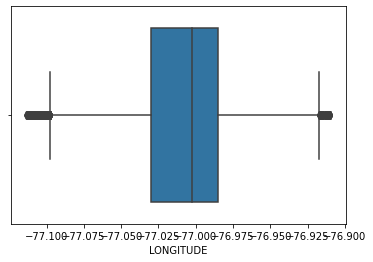

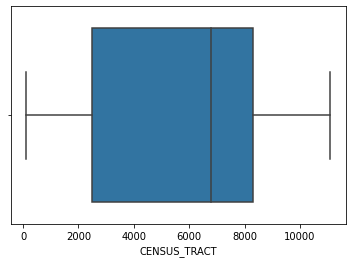

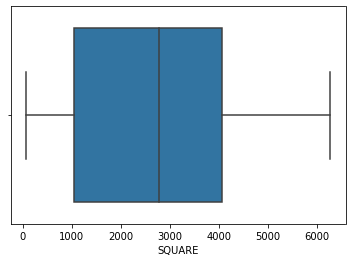

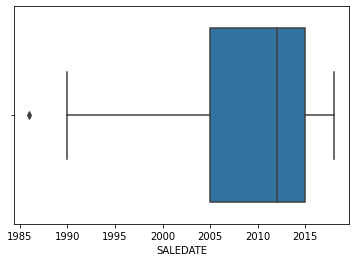

In [40]:
### Let's plot boxplot too, to check for skewness-

for column in continuous_dt_cols:
    sns.boxplot(data_temp[column])
    plt.show()

From the graphs it can be seen that all continues features have outliers.Outliers can be a problem for linear model performance. I will leave this outliers without preprocessing them, as they do not effect tree based models.

In [46]:
#Following columns have skewness-
# Skew for  NUM_UNITS 2.89018383370766 --
# Skew for  ROOMS 1.7164867195269389
# Skew for  BEDRM 1.4684919668150573
# Skew for  YR_RMDL -54.285052120479115 --
# Skew for  STORIES 148.2528050909236 --
# Skew for  SALE_NUM 1.646308823946258
# Skew for  GBA 1.6124250824353794
# Skew for  KITCHENS 10.418635077465108 --
# Skew for  FIREPLACES 1.7677866145509775
# Skew for  USECODE 1.6272872483403062
# Skew for  LANDAREA 3.571636554803603

In [41]:
data_temp_copy = data_temp.copy()
data_temp_copy.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,QUADRANT,SALEDATE
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,1680,20009,38.914680,-77.040832,Old City 2,4201,Ward 2,152,NW,2003
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,1627,20009,38.915408,-77.040129,Old City 2,4201,Ward 2,152,NW,2011
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,1424,20009,38.915017,-77.039903,Old City 2,4201,Ward 2,152,NW,2018
5,3,1,Warm Cool,Y,2,5,3,1917,2000,1967,...,1815,20009,38.915038,-77.039716,Old City 2,4201,Ward 2,152,NW,2011
6,3,1,Warm Cool,Y,1,8,3,1908,2006,1967,...,1424,20009,38.915018,-77.039844,Old City 2,4201,Ward 2,152,NW,2010


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Skew for  NUM_UNITS 2.257380091150599
Skew for  ROOMS 0.5985218765593323
Skew for  BEDRM 0.24241468887986428
Skew for  YR_RMDL -153.3522963501992
Skew for  STORIES 4.588765695219975
Skew for  SALE_NUM 1.0308542854923661
Skew for  GBA 0.33159473566196485
Skew for  KITCHENS 2.066421167143263
Skew for  FIREPLACES 0.6939817809536529
Skew for  USECODE 1.5585990384668158
Skew for  LANDAREA 0.49085237831467526


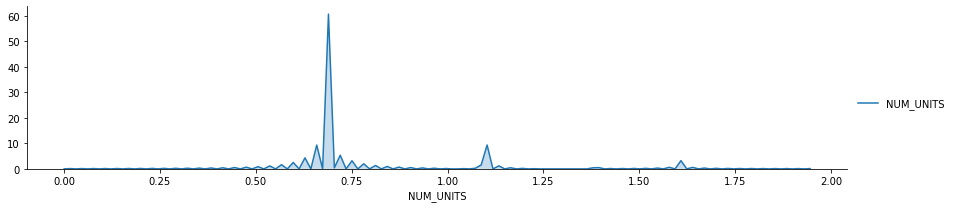

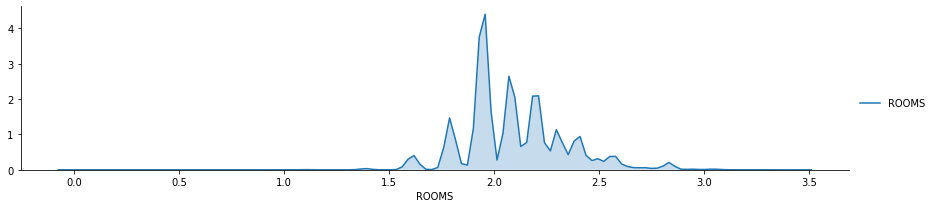

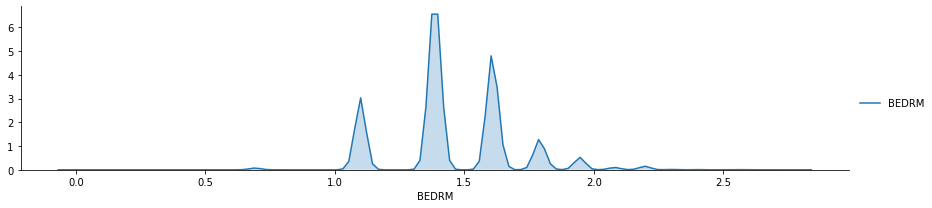

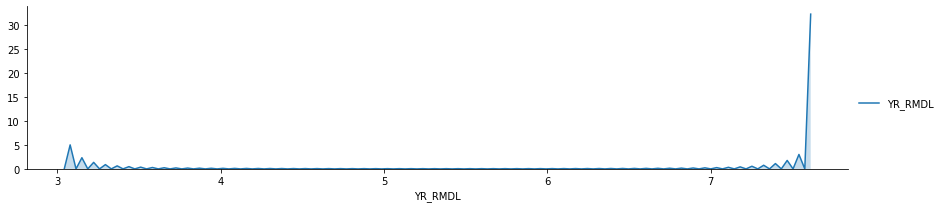

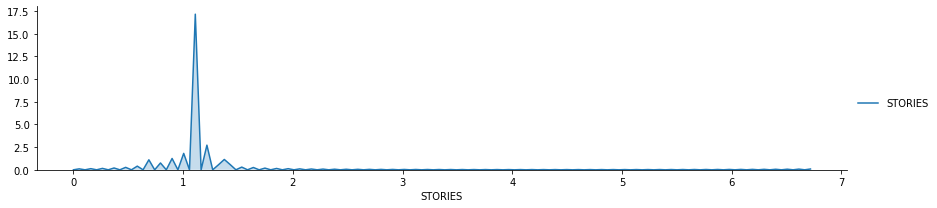

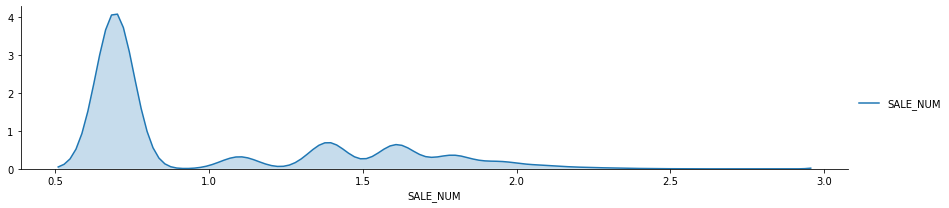

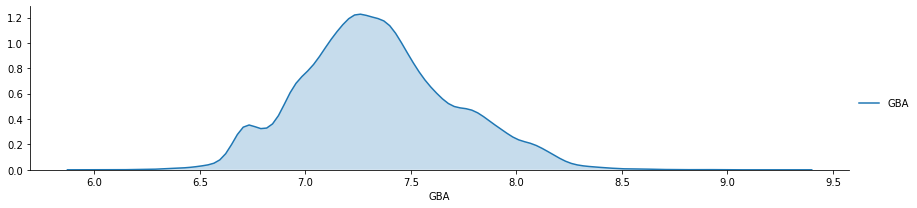

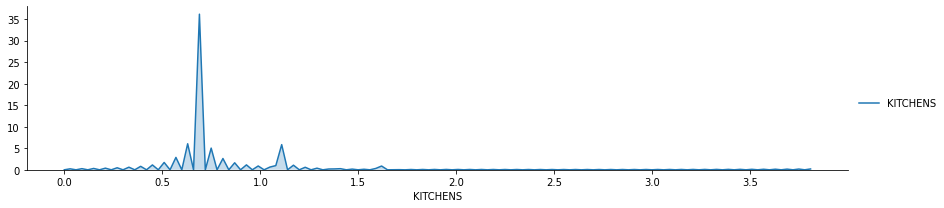

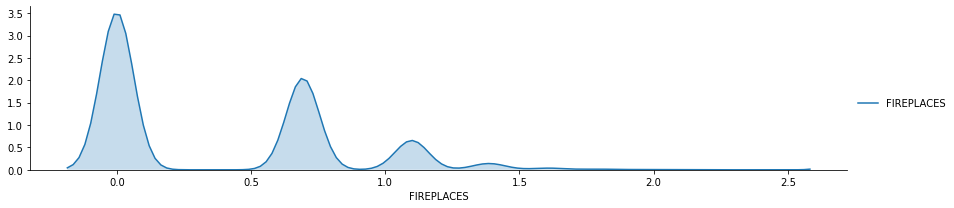

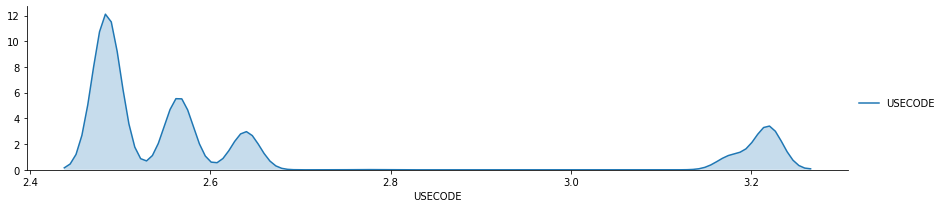

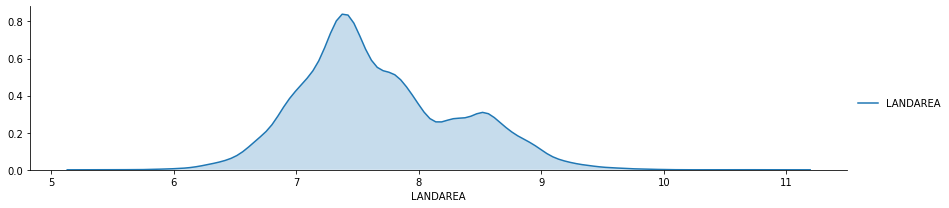

In [42]:
skewed = ['NUM_UNITS','ROOMS','BEDRM','YR_RMDL','STORIES','SALE_NUM','GBA','KITCHENS','FIREPLACES','USECODE','LANDAREA']

def log_transform(data):
    return data[skewed].apply(lambda x: np.log(x + 1))
    
data_temp[skewed] = log_transform(data_temp)

# Visualize the new log distributions
for column in skewed:
    a = sns.FacetGrid(data_temp, aspect=4 )
    a.map(sns.kdeplot, column, shade= True )
    a.add_legend()
    print('Skew for ',str(column), data_temp[column].skew())

Applying log transformation on the skewed features, helped to reduce skew, however, skew is still pretty high for few of these features.

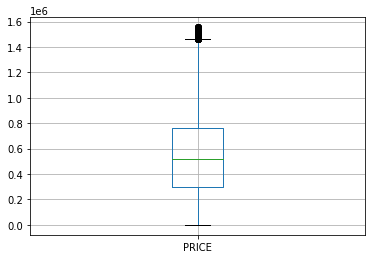

In [43]:
data_temp.boxplot(column="PRICE")

In [37]:
data_temp.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'QUALIFIED', 'SALE_NUM',
       'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF',
       'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'ZIPCODE',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'CENSUS_TRACT', 'WARD',
       'SQUARE', 'QUADRANT', 'SALEDATE'],
      dtype='object')

In [47]:
continuous_dt_cols

['BATHRM',
 'HF_BATHRM',
 'NUM_UNITS',
 'ROOMS',
 'BEDRM',
 'AYB',
 'YR_RMDL',
 'EYB',
 'STORIES',
 'SALE_NUM',
 'GBA',
 'KITCHENS',
 'FIREPLACES',
 'USECODE',
 'LANDAREA',
 'ZIPCODE',
 'LATITUDE',
 'LONGITUDE',
 'CENSUS_TRACT',
 'SQUARE',
 'SALEDATE']

In [44]:
### Handling categorical columns
categorical_cols = data_temp.select_dtypes(include=['object'])
categorical_cols.head()

,HEAT,AC,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,ASSESSMENT_NBHD,WARD,QUADRANT
0,Warm Cool,Y,Q,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,Old City 2,Ward 2,NW
3,Hot Water Rad,Y,Q,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,Old City 2,Ward 2,NW
4,Warm Cool,Y,Q,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood,Old City 2,Ward 2,NW
5,Warm Cool,Y,Q,2 Story,Row Inside,Above Average,Very Good,Stucco,Metal- Sms,Hardwood,Old City 2,Ward 2,NW
6,Warm Cool,Y,Q,2 Story,Row Inside,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,Old City 2,Ward 2,NW


In [49]:
categorical_cols.iloc[3,:]

HEAT                   Warm Cool
AC                             Y
QUALIFIED                      Q
STYLE                    2 Story
STRUCT                Row Inside
GRADE              Above Average
CNDTN                  Very Good
EXTWALL                   Stucco
ROOF                  Metal- Sms
INTWALL                 Hardwood
ASSESSMENT_NBHD       Old City 2
WARD                      Ward 2
QUADRANT                      NW
Name: 5, dtype: object

In [50]:
categorical_cols.shape

(27507, 13)

In [402]:
# from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler().fit(numerical_cols)

# sclaed_num = scaler.transform(numerical_cols)
# sclaed_num = pd.DataFrame(sclaed_num, columns=numerical_cols.columns)

In [404]:
# sclaed_num.shape

In [403]:
# sclaed_num.head()

In [405]:
# sclaed_num.boxplot(column="PRICE")

In [ ]:
### Encoding on Categorical columns 

In [45]:
np.where(categorical_cols.AC=='Y',1,categorical_cols.AC)

array([1, 1, 1, ..., 1, 'N', 1], dtype=object)

In [46]:
data_temp

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,QUADRANT,SALEDATE
0,4,0,Warm Cool,Y,1.098612,2.197225,1.609438,1910,7.595387,1972,...,7.427144,20009,38.914680,-77.040832,Old City 2,4201,Ward 2,152,NW,2003
3,3,1,Hot Water Rad,Y,1.098612,2.197225,1.609438,1906,7.606885,1972,...,7.395108,20009,38.915408,-77.040129,Old City 2,4201,Ward 2,152,NW,2011
4,3,1,Warm Cool,Y,1.098612,2.079442,1.386294,1908,7.605392,1967,...,7.261927,20009,38.915017,-77.039903,Old City 2,4201,Ward 2,152,NW,2018
5,3,1,Warm Cool,Y,1.098612,1.791759,1.386294,1917,7.601402,1967,...,7.504392,20009,38.915038,-77.039716,Old City 2,4201,Ward 2,152,NW,2011
6,3,1,Warm Cool,Y,0.693147,2.197225,1.386294,1908,7.604396,1967,...,7.261927,20009,38.915018,-77.039844,Old City 2,4201,Ward 2,152,NW,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,3,0,Forced Air,N,1.386294,2.639057,2.197225,1953,7.609367,1971,...,8.577724,20032,38.821822,-77.006996,Congress Heights,10900,Ward 8,6254,SW,2000
28896,3,0,Forced Air,N,1.386294,2.708050,1.945910,1953,7.600902,1971,...,8.963416,20032,38.821888,-77.006997,Congress Heights,10900,Ward 8,6254,SW,2000
28897,2,0,Forced Air,Y,1.098612,2.397895,1.609438,1953,7.609862,1971,...,8.576028,20032,38.821813,-77.006034,Congress Heights,10900,Ward 8,6254,SW,2016
28898,2,0,Forced Air,N,1.098612,2.397895,1.609438,1953,7.609862,1971,...,8.021913,20032,38.821356,-77.006528,Congress Heights,10900,Ward 8,6254,SW,2017


In [47]:
## Do Label Encoding on AC, QUALIFIED and CNDTN columns
data_temp['AC_le'] = np.where(data_temp.AC=='Y',1,data_temp.AC)
data_temp['AC_le'] = np.where(data_temp.AC=='N',0,data_temp.AC_le)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
data_temp.AC_le

0        1
3        1
4        1
5        1
6        1
        ..
28895    0
28896    0
28897    1
28898    0
28899    1
Name: AC_le, Length: 27507, dtype: object

In [48]:
data_temp['QUALIFIED_le'] = np.where(data_temp.QUALIFIED=='Q',1,data_temp.QUALIFIED)
data_temp['QUALIFIED_le'] = np.where(data_temp.QUALIFIED=='U',0,data_temp.QUALIFIED_le)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
data_temp['CNDTN_le'] = np.where(data_temp.CNDTN =='Excellent',6,data_temp.CNDTN )
data_temp['CNDTN_le'] = np.where(data_temp.CNDTN =='Very Good',5,data_temp.CNDTN_le)
data_temp['CNDTN_le'] = np.where(data_temp.CNDTN =='Good',4,data_temp.CNDTN_le)
data_temp['CNDTN_le'] = np.where(data_temp.CNDTN =='Average',3,data_temp.CNDTN_le)
data_temp['CNDTN_le'] = np.where(data_temp.CNDTN =='Fair',2,data_temp.CNDTN_le)
data_temp['CNDTN_le'] = np.where(data_temp.CNDTN =='Poor',1,data_temp.CNDTN_le)
data_temp['CNDTN_le'] = np.where(data_temp.CNDTN =='Default',0,data_temp.CNDTN_le)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [44]:
data_temp.CNDTN_le.value_counts()
## Label Encoding done

4    16372
3     7820
5     3194
2       77
6       32
1       12
Name: CNDTN_le, dtype: int64

In [50]:
#### Remove old columns- AC, CNDTN, QUALIFIED

data_temp.drop(columns=['AC', 'CNDTN', 'QUALIFIED'], axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
### Convert	AC_le,	QUALIFIED_le,	CNDTN_le into integer columns


# convert Series to float16 type
data_temp.AC_le = data_temp.AC_le.astype(np.int64)
data_temp.CNDTN_le = data_temp.CNDTN_le.astype(np.int64)
data_temp.QUALIFIED_le = data_temp.QUALIFIED_le.astype(np.int64)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
## One Hot encoding on remaining categorical columns
data_temp.select_dtypes(include=['object'])

,HEAT,STYLE,STRUCT,GRADE,EXTWALL,ROOF,INTWALL,ASSESSMENT_NBHD,WARD,QUADRANT
0,Warm Cool,3 Story,Row Inside,Very Good,Common Brick,Metal- Sms,Hardwood,Old City 2,Ward 2,NW
3,Hot Water Rad,3 Story,Row Inside,Very Good,Common Brick,Metal- Sms,Hardwood,Old City 2,Ward 2,NW
4,Warm Cool,2 Story,Row Inside,Above Average,Common Brick,Built Up,Hardwood,Old City 2,Ward 2,NW
5,Warm Cool,2 Story,Row Inside,Above Average,Stucco,Metal- Sms,Hardwood,Old City 2,Ward 2,NW
6,Warm Cool,2 Story,Row Inside,Above Average,Common Brick,Metal- Sms,Hardwood,Old City 2,Ward 2,NW
...,...,...,...,...,...,...,...,...,...,...
28895,Forced Air,2 Story,Multi,Average,Common Brick,Built Up,Hardwood,Congress Heights,Ward 8,SW
28896,Forced Air,3 Story,Multi,Average,Common Brick,Built Up,Hardwood,Congress Heights,Ward 8,SW
28897,Forced Air,2 Story,Multi,Average,Common Brick,Built Up,Hardwood,Congress Heights,Ward 8,SW
28898,Forced Air,2 Story,Multi,Average,Common Brick,Comp Shingle,Hardwood,Congress Heights,Ward 8,SW


In [53]:
## Numerical columns
data.select_dtypes(exclude=['object'])

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,SALEDATE
0,4,0,2,8,4,1910,1988,1972,3.0,1095000,...,2,5,24,1680,20009,38.914680,-77.040832,4201,152,2003
1,3,1,2,9,5,1910,2009,1984,3.0,2100000,...,2,4,24,1680,20009,38.914684,-77.040678,4201,152,2016
2,3,1,2,8,5,1900,2003,1984,3.0,1602000,...,2,3,24,1680,20009,38.914683,-77.040629,4201,152,2006
3,3,1,2,8,4,1906,2011,1972,3.0,1050000,...,2,1,24,1627,20009,38.915408,-77.040129,4201,152,2011
4,3,1,2,7,3,1908,2008,1967,2.0,1430000,...,2,1,24,1424,20009,38.915017,-77.039903,4201,152,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,3,0,3,13,8,1953,2016,1971,2.0,118000,...,3,0,23,5311,20032,38.821822,-77.006996,10900,6254,2000
28896,3,0,3,14,6,1953,1999,1971,3.0,1,...,3,0,23,7811,20032,38.821888,-77.006997,10900,6254,2000
28897,2,0,2,10,4,1953,2017,1971,2.0,185000,...,2,0,23,5302,20032,38.821813,-77.006034,10900,6254,2016
28898,2,0,2,10,4,1953,2017,1971,2.0,215000,...,2,0,23,3046,20032,38.821356,-77.006528,10900,6254,2017


In [ ]:

data_temp = pd.DataFrame(pd.get_dummies(data_temp, columns=['HEAT', 'STYLE', 'STRUCT', 'GRADE','EXTWALL', 'ROOF', 'INTWALL', 'ASSESSMENT_NBHD', 'WARD', 'QUADRANT']))
data_temp

In [55]:
data_df = data_temp.copy()
data_df

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,4,0,1.098612,2.197225,1.609438,1910,7.595387,1972,1.386294,1095000,...,0,0,0,0,0,0,0,1,0,0
3,3,1,1.098612,2.197225,1.609438,1906,7.606885,1972,1.386294,1050000,...,0,0,0,0,0,0,0,1,0,0
4,3,1,1.098612,2.079442,1.386294,1908,7.605392,1967,1.098612,1430000,...,0,0,0,0,0,0,0,1,0,0
5,3,1,1.098612,1.791759,1.386294,1917,7.601402,1967,1.098612,1325000,...,0,0,0,0,0,0,0,1,0,0
6,3,1,0.693147,2.197225,1.386294,1908,7.604396,1967,1.098612,1240000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,3,0,1.386294,2.639057,2.197225,1953,7.609367,1971,1.098612,118000,...,0,0,0,0,0,1,0,0,0,1
28896,3,0,1.386294,2.708050,1.945910,1953,7.600902,1971,1.386294,1,...,0,0,0,0,0,1,0,0,0,1
28897,2,0,1.098612,2.397895,1.609438,1953,7.609862,1971,1.098612,185000,...,0,0,0,0,0,1,0,0,0,1
28898,2,0,1.098612,2.397895,1.609438,1953,7.609862,1971,1.098612,215000,...,0,0,0,0,0,1,0,0,0,1


In [56]:
data_df.drop(columns=['PRICE'], axis=1)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,4,0,1.098612,2.197225,1.609438,1910,7.595387,1972,1.386294,0.693147,...,0,0,0,0,0,0,0,1,0,0
3,3,1,1.098612,2.197225,1.609438,1906,7.606885,1972,1.386294,0.693147,...,0,0,0,0,0,0,0,1,0,0
4,3,1,1.098612,2.079442,1.386294,1908,7.605392,1967,1.098612,1.609438,...,0,0,0,0,0,0,0,1,0,0
5,3,1,1.098612,1.791759,1.386294,1917,7.601402,1967,1.098612,0.693147,...,0,0,0,0,0,0,0,1,0,0
6,3,1,0.693147,2.197225,1.386294,1908,7.604396,1967,1.098612,0.693147,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,3,0,1.386294,2.639057,2.197225,1953,7.609367,1971,1.098612,0.693147,...,0,0,0,0,0,1,0,0,0,1
28896,3,0,1.386294,2.708050,1.945910,1953,7.600902,1971,1.386294,0.693147,...,0,0,0,0,0,1,0,0,0,1
28897,2,0,1.098612,2.397895,1.609438,1953,7.609862,1971,1.098612,1.386294,...,0,0,0,0,0,1,0,0,0,1
28898,2,0,1.098612,2.397895,1.609438,1953,7.609862,1971,1.098612,1.609438,...,0,0,0,0,0,1,0,0,0,1


In [58]:
data_df.PRICE

0        1095000
3        1050000
4        1430000
5        1325000
6        1240000
          ...   
28895     118000
28896          1
28897     185000
28898     215000
28899     140000
Name: PRICE, Length: 27507, dtype: int64

In [224]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27507 entries, 0 to 28899
Columns: 163 entries, BATHRM to QUADRANT_SW
dtypes: float64(13), int64(11), uint8(139)
memory usage: 8.9 MB


In [64]:
continuous_dt_cols_with_target_1 = ['BATHRM',
 'HF_BATHRM',
 'NUM_UNITS',
 'ROOMS',
 'BEDRM',
 'PRICE']

continuous_dt_cols_with_target_2 = ['AYB',
 'YR_RMDL',
 'EYB',
 'STORIES',
 'SALE_NUM',
 'SALEDATE','PRICE']

continuous_dt_cols_with_target_3 = ['GBA',
 'KITCHENS',
 'FIREPLACES',
 'USECODE',
 'LANDAREA','PRICE']

continuous_dt_cols_with_target_4 = ['ZIPCODE',
 'LATITUDE',
 'LONGITUDE',
 'CENSUS_TRACT',
 'SQUARE','PRICE']

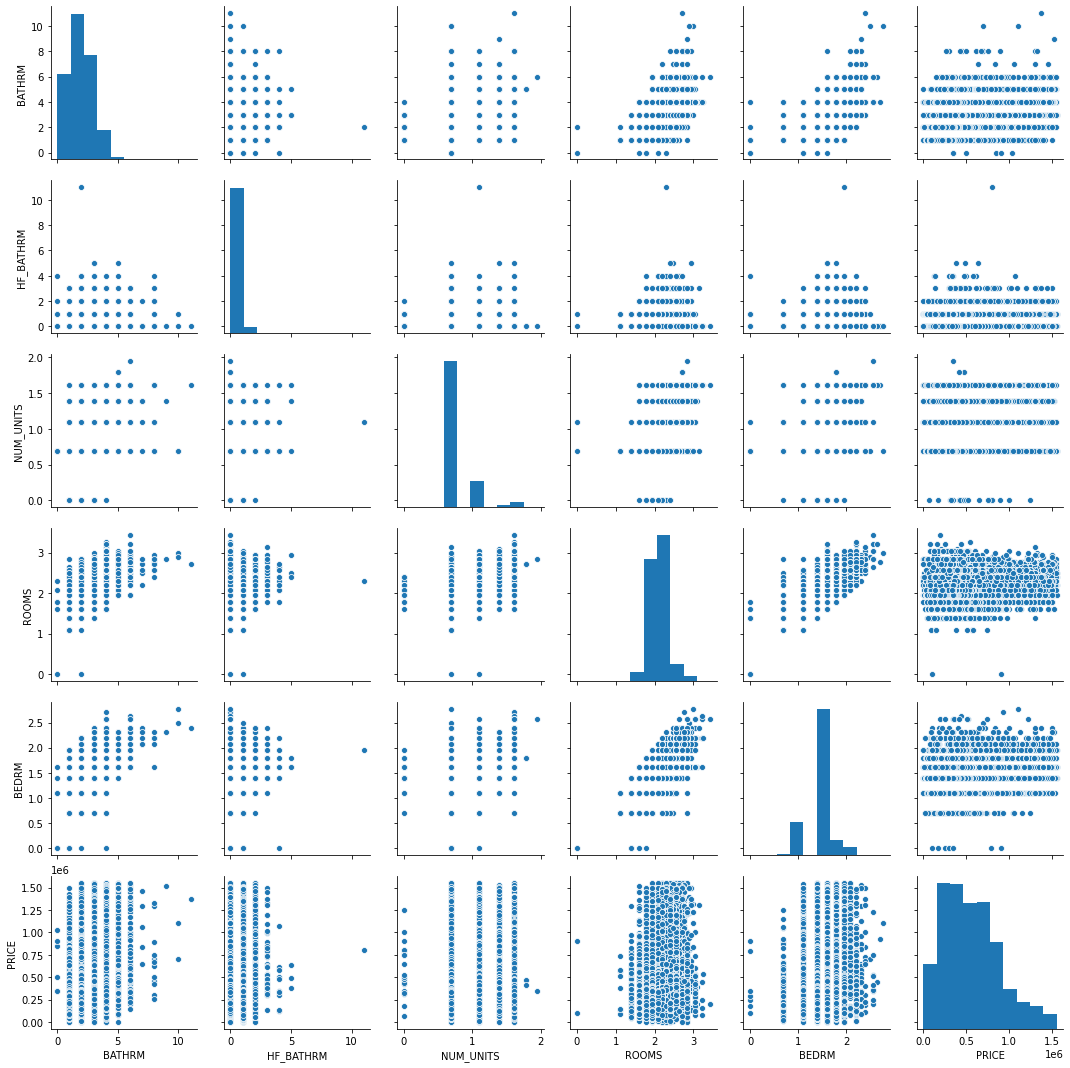

In [265]:
## Pairplot of continuous columns-
sns.pairplot(data_temp[continuous_dt_cols_with_target_1])

It can be seen from the above plot, that Rooms and Bathrooms, both have some kind of linear relationship

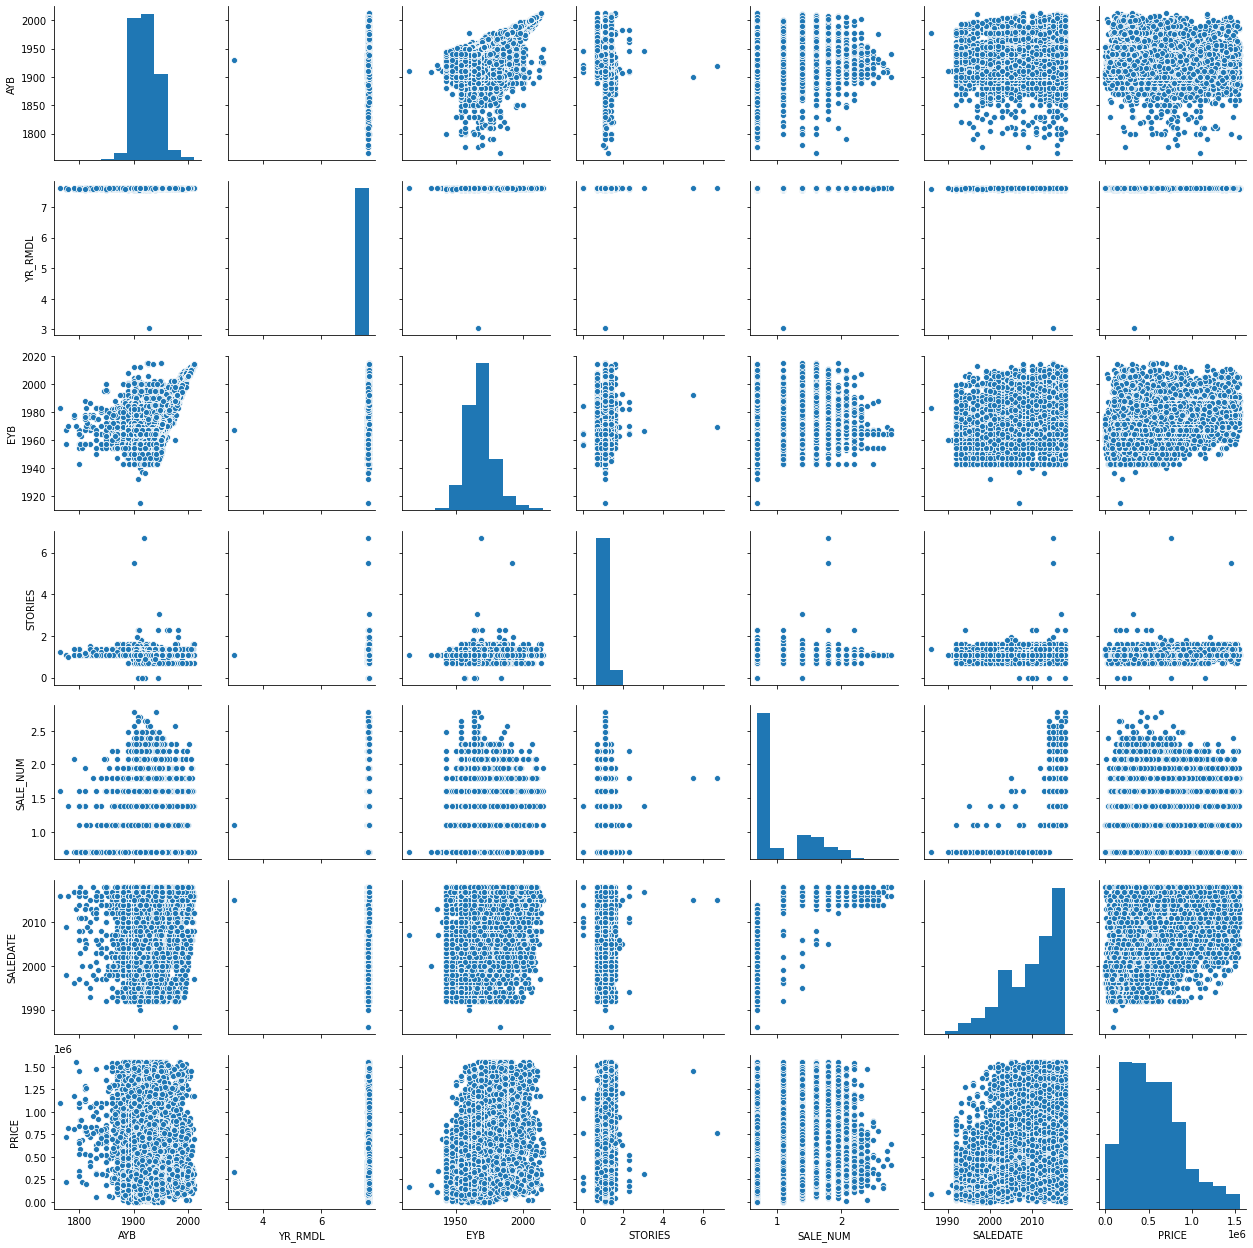

In [266]:
## 
sns.pairplot(data_temp[continuous_dt_cols_with_target_2])

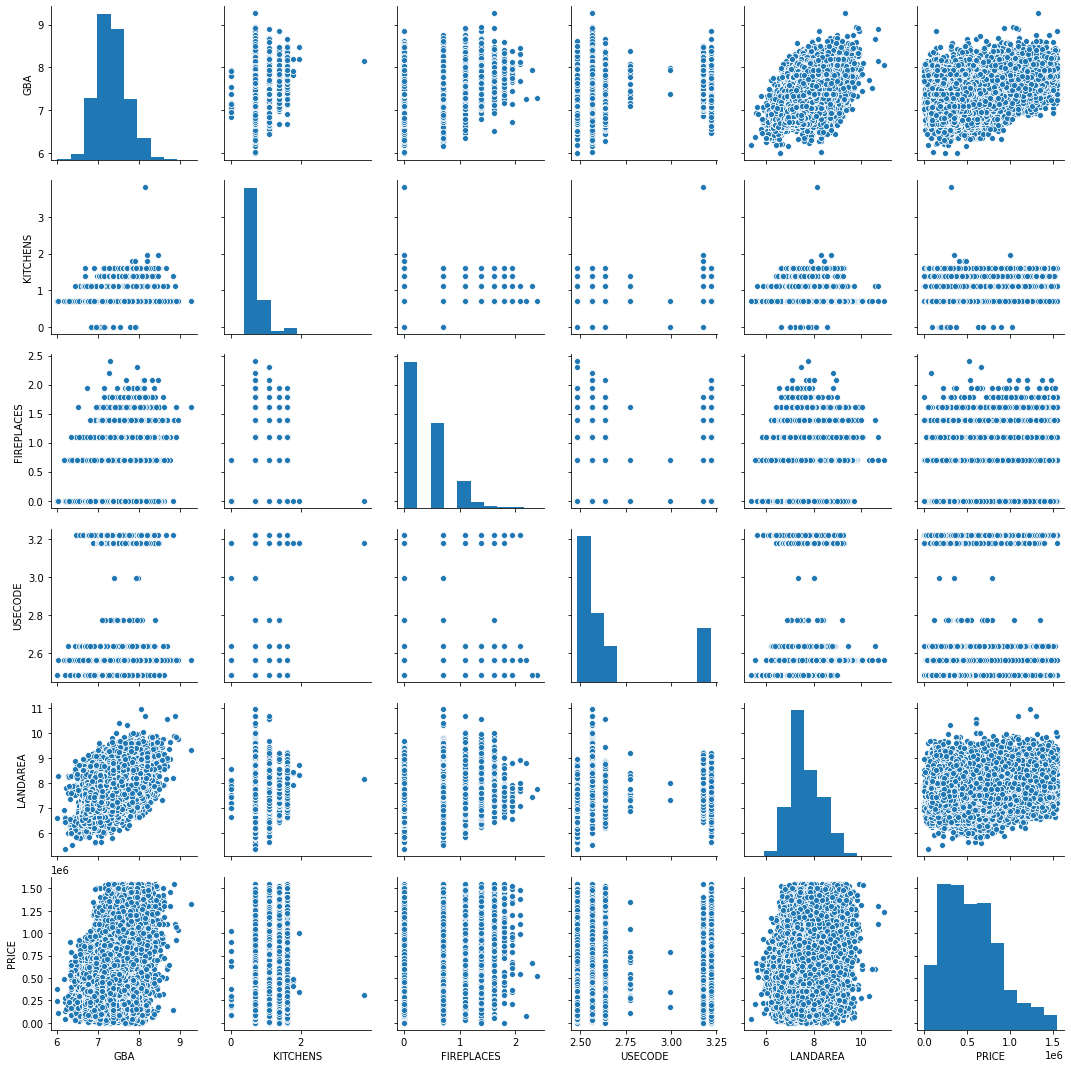

In [267]:
sns.pairplot(data_temp[continuous_dt_cols_with_target_3])

In [268]:
## It can be seen from the above plot, that Landarea and GBA have some kind of linear relationship

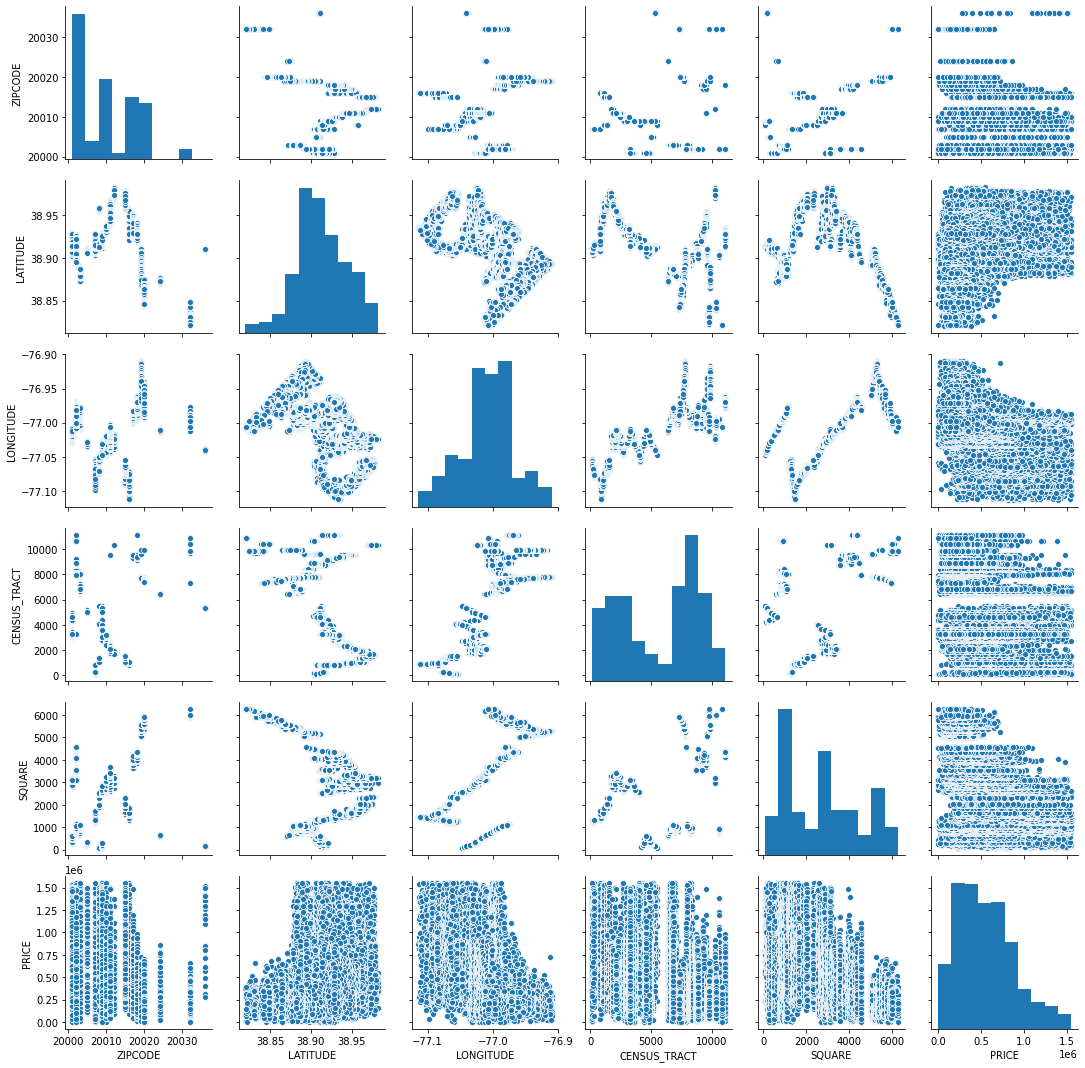

In [269]:
sns.pairplot(data_temp[continuous_dt_cols_with_target_4])

In [55]:
continuous_dt_cols_with_target = ['BATHRM',
 'HF_BATHRM',
 'NUM_UNITS',
 'ROOMS',
 'BEDRM', 'AYB',
 'YR_RMDL',
 'EYB',
 'STORIES',
 'SALE_NUM',
 'SALEDATE', 'GBA',
 'KITCHENS',
 'FIREPLACES',
 'USECODE',
 'LANDAREA', 'ZIPCODE',
 'LATITUDE',
 'LONGITUDE',
 'CENSUS_TRACT','SQUARE','PRICE']

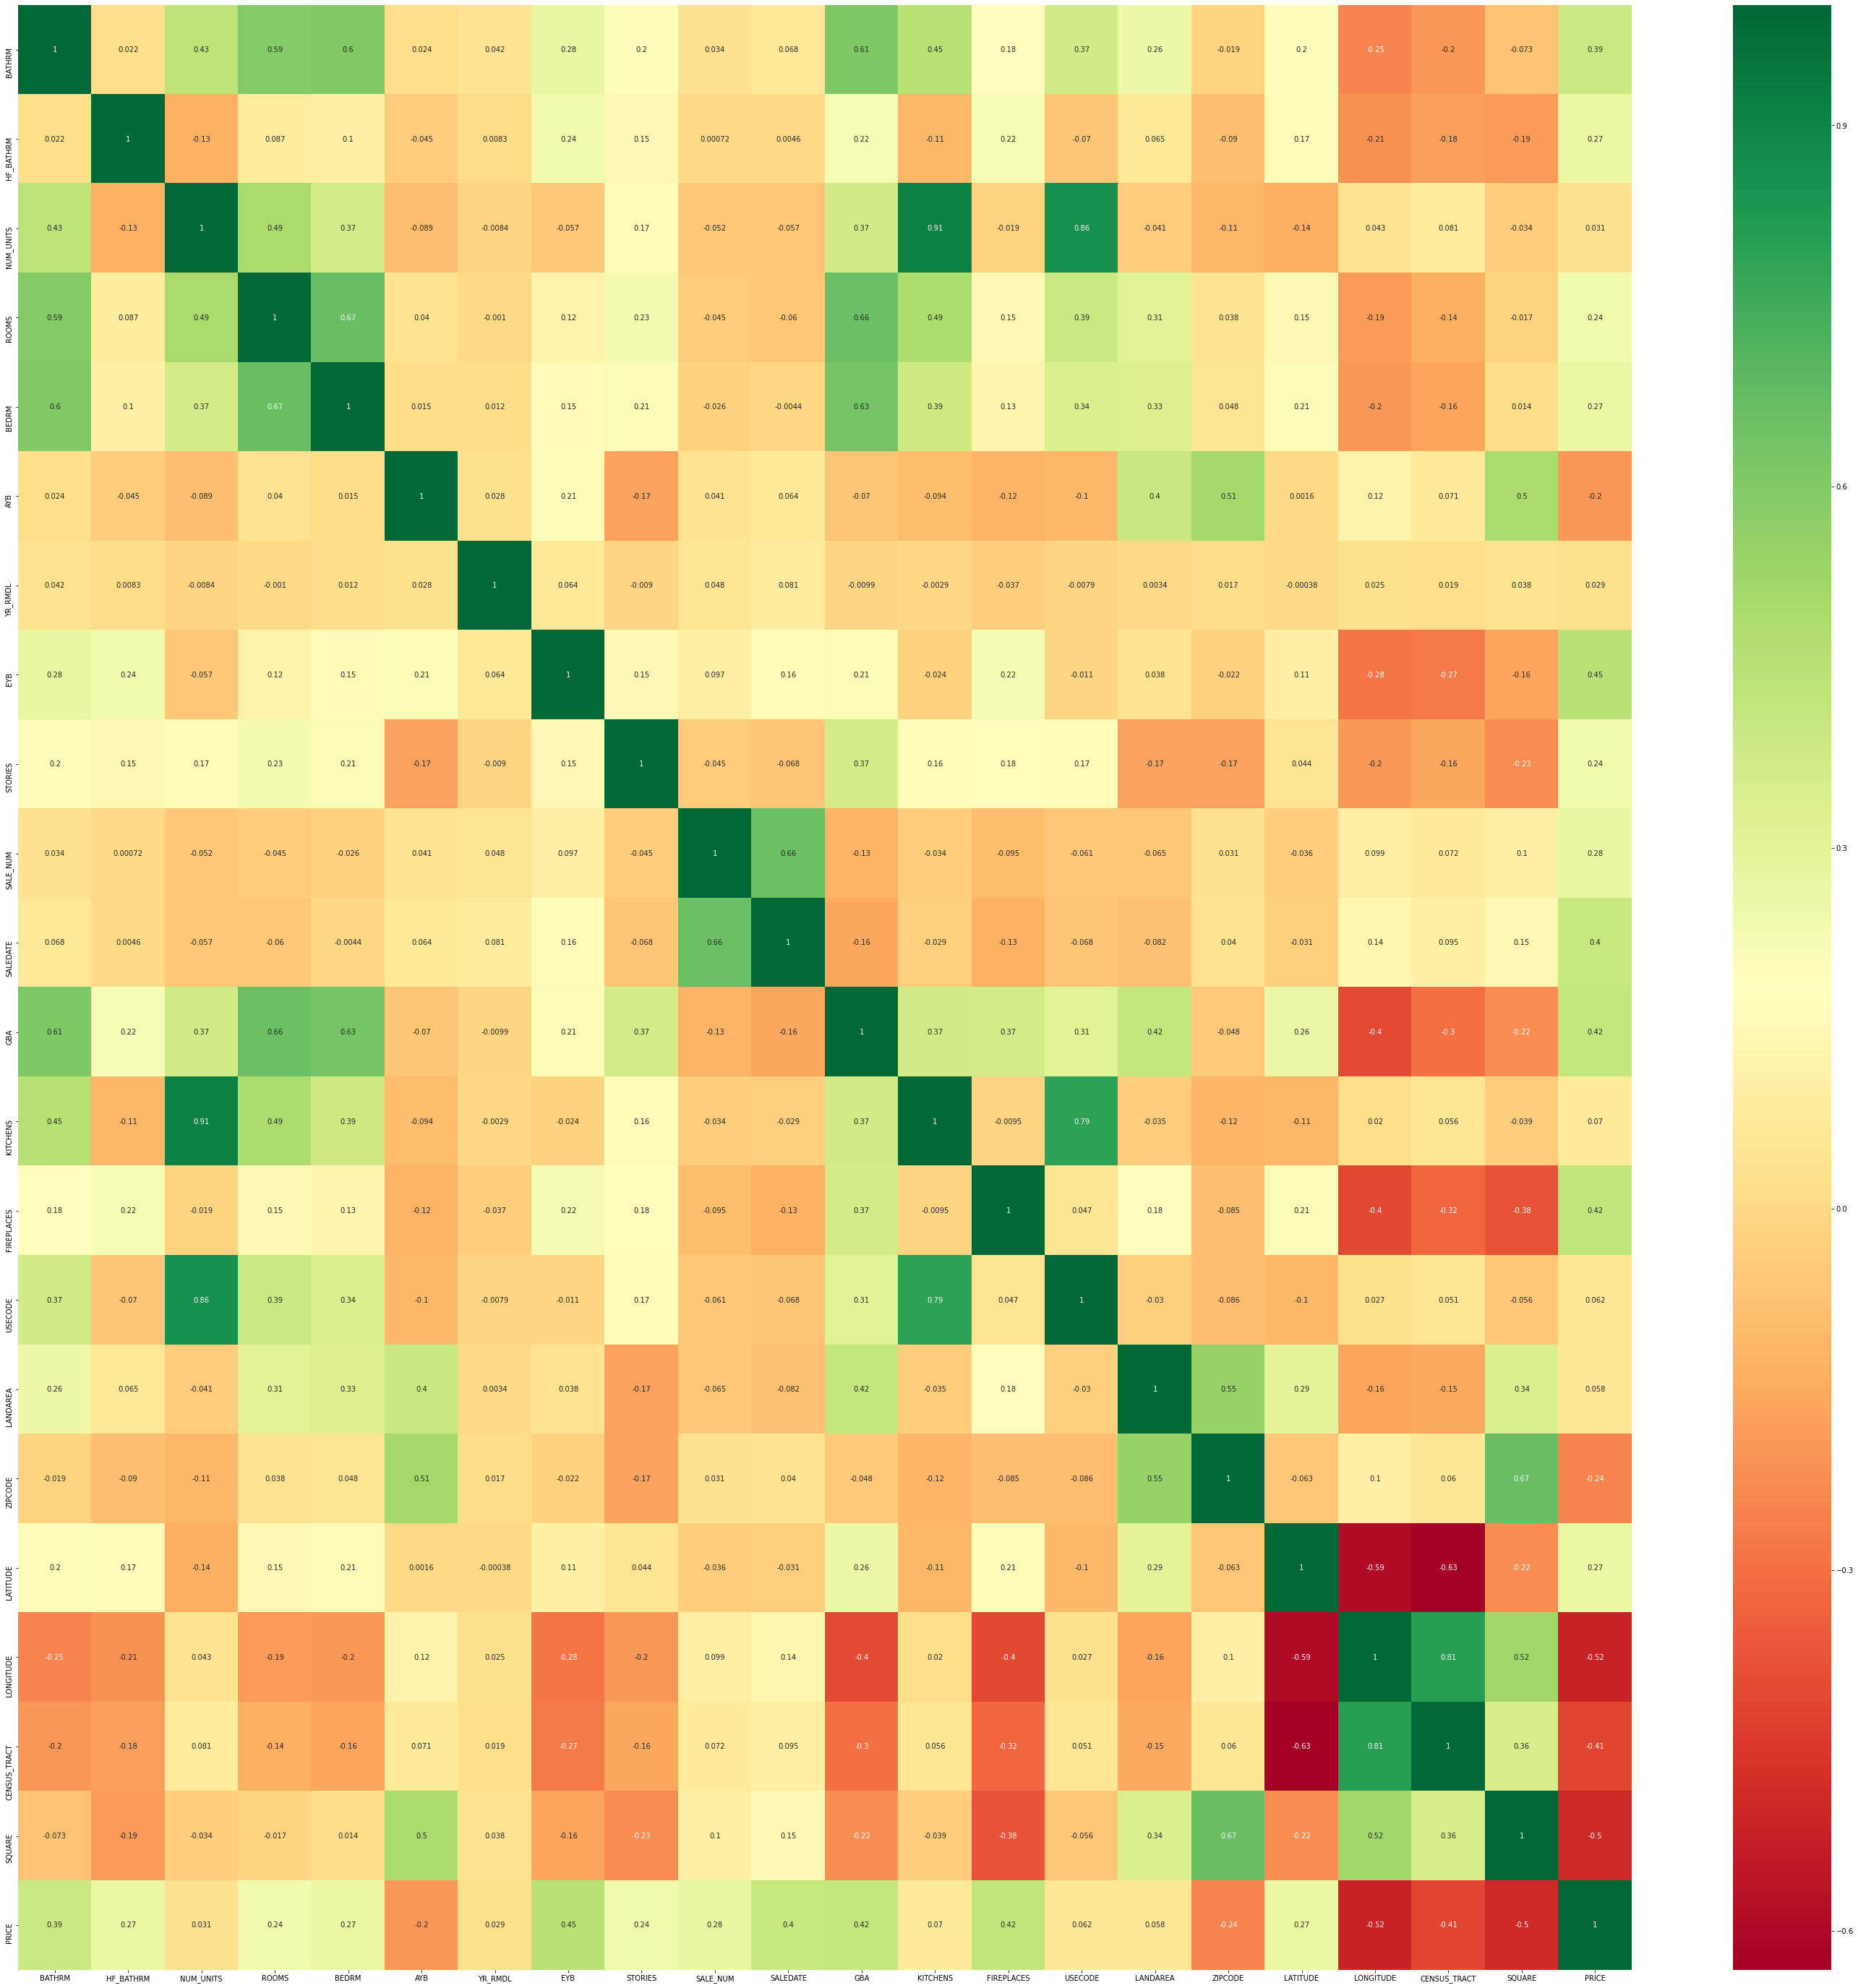

In [272]:
## Heatmap of Continuous columns- (Pearson's correlation)

data_temp_cont = data_temp[continuous_dt_cols_with_target]
corrmat = data_temp_cont.corr()
topp_corr_features = corrmat.index
plt.figure(figsize=(50, 50))
g = sns.heatmap(data_temp_cont[topp_corr_features].corr(), annot=True, cmap="RdYlGn")

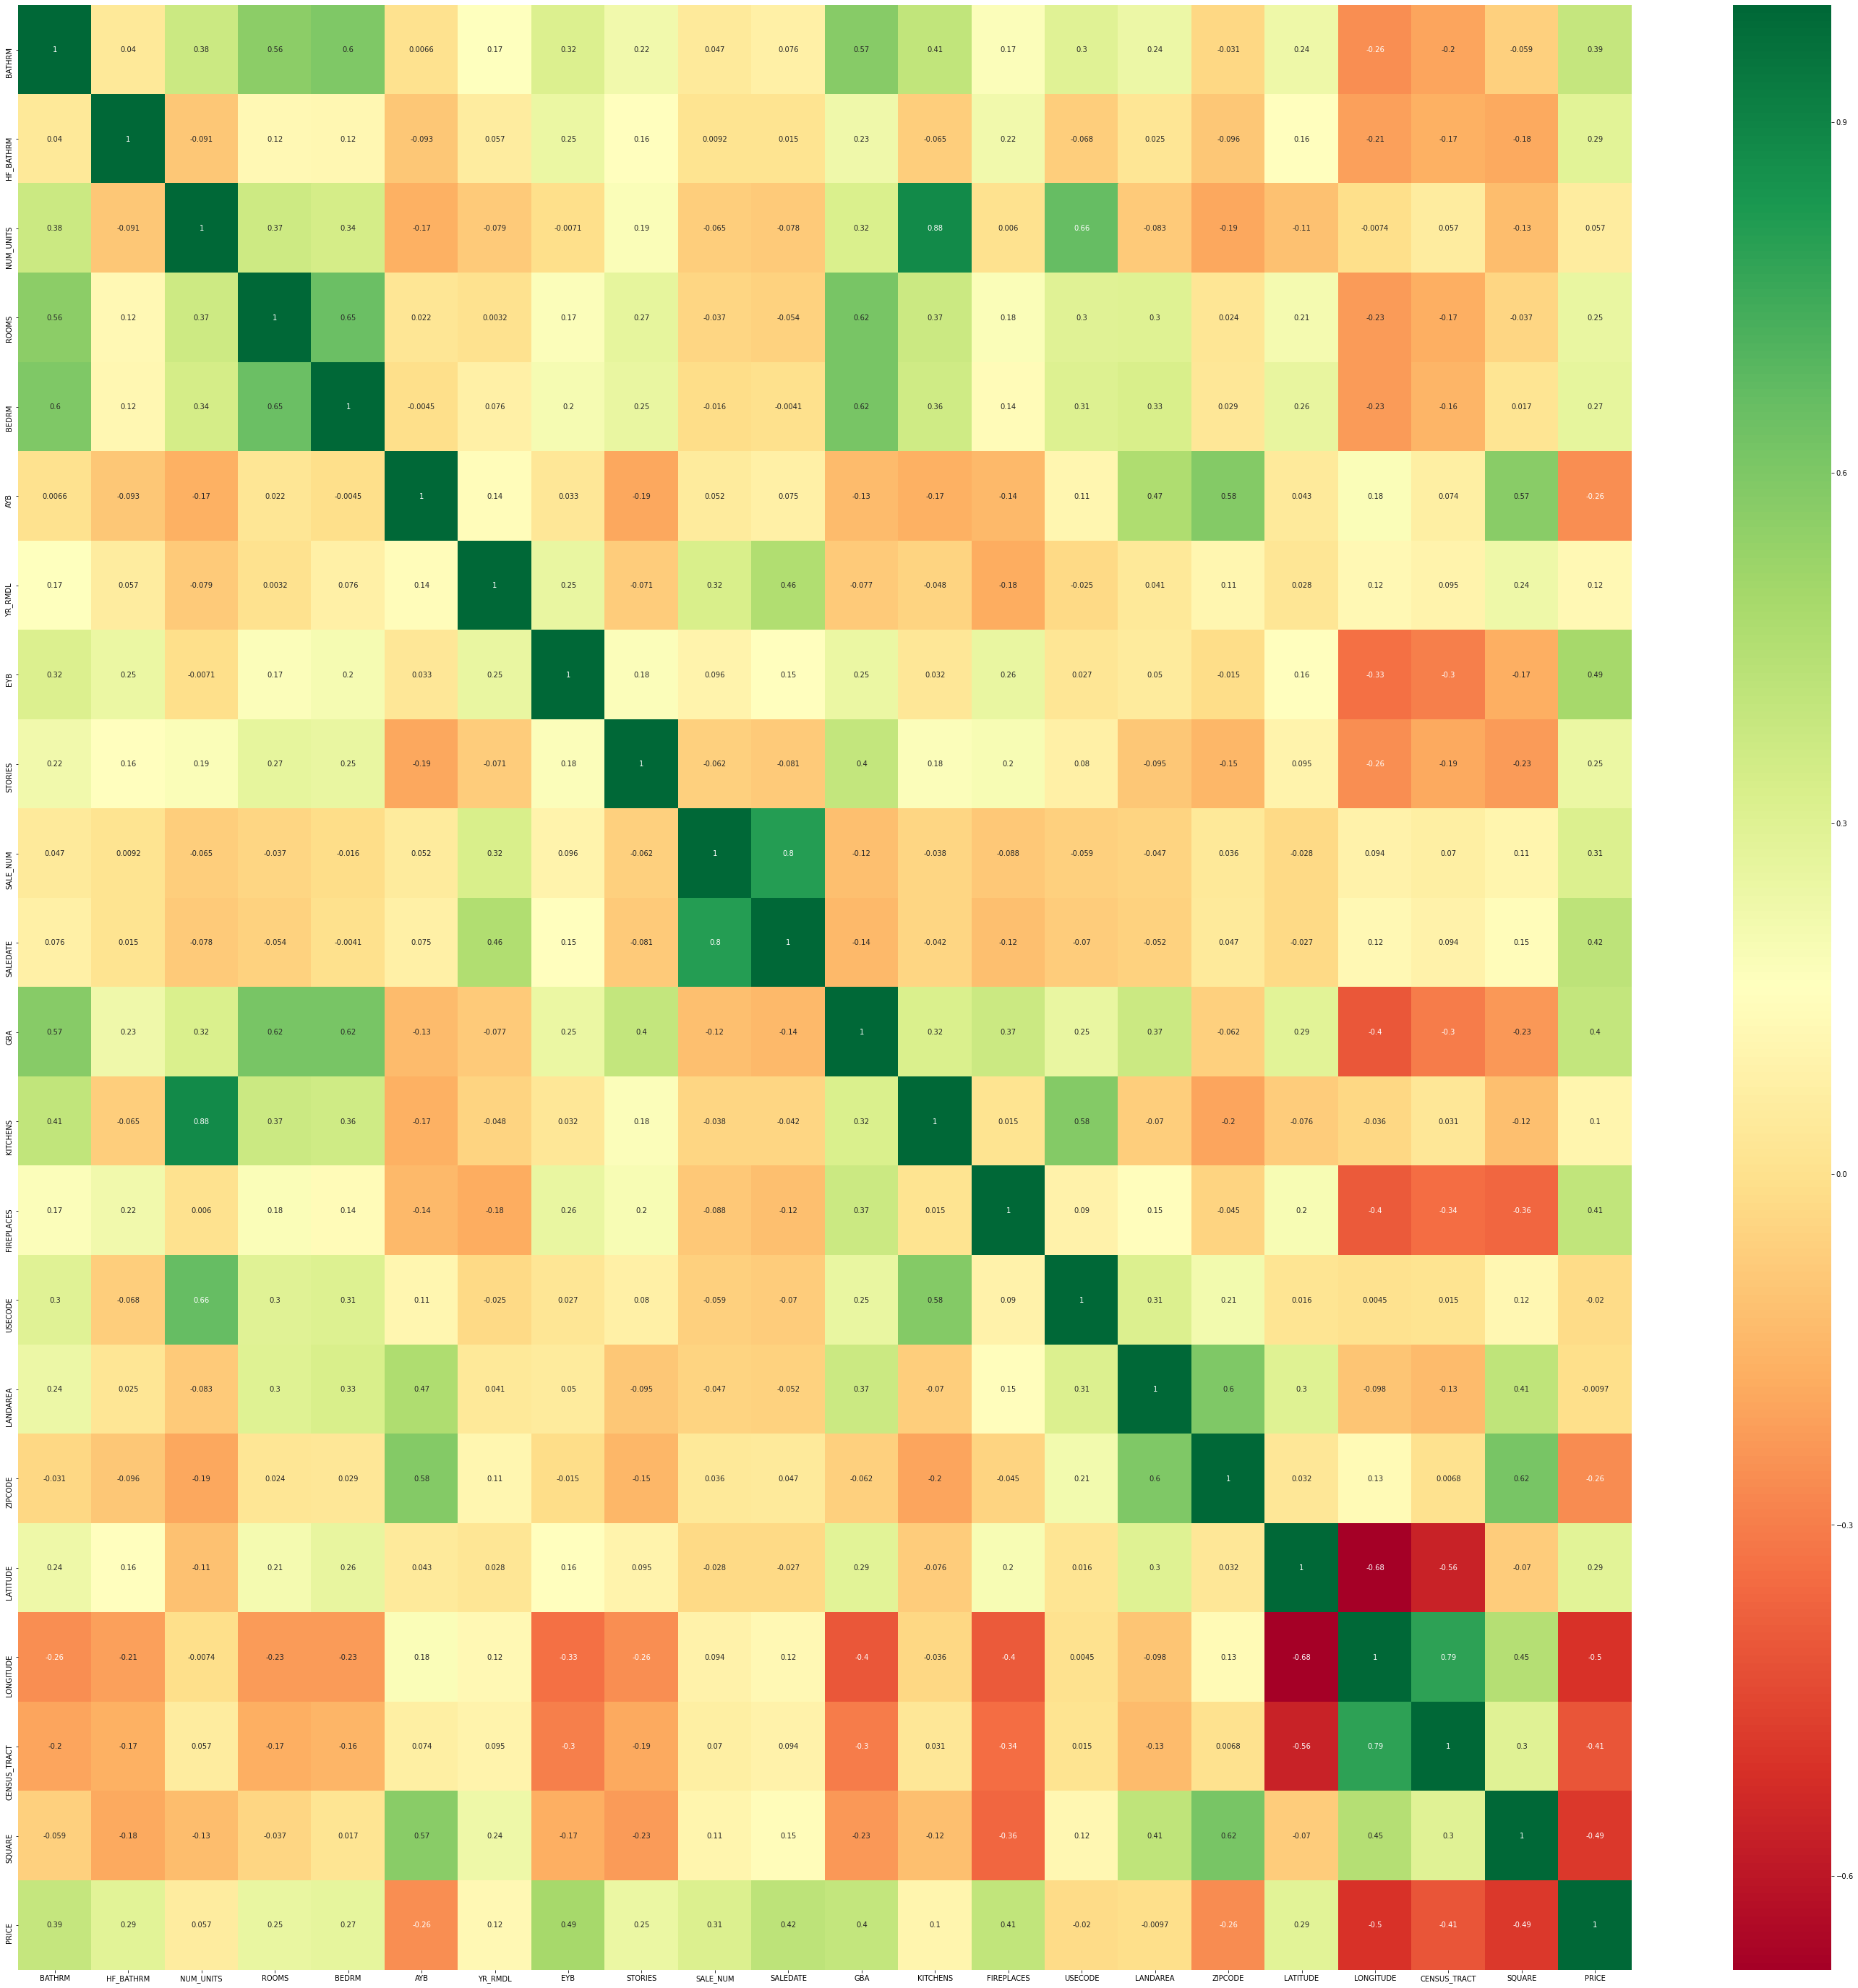

In [274]:
## Heatmap of Continuous columns- (Spearman correlation)

data_temp_cont = data_temp[continuous_dt_cols_with_target]
corrmat = data_temp_cont.corr()
topp_corr_features = corrmat.index
plt.figure(figsize=(50, 50))
g = sns.heatmap(data_temp_cont[topp_corr_features].corr(method='spearman'), annot=True, cmap="RdYlGn")

In [312]:
numerical_dt_cols_with_target.columns

Index(['PRICE', 'AC_le', 'QUALIFIED_le', 'CNDTN_le', 'HEAT_Air Exchng',
       'HEAT_Air-Oil', 'HEAT_Elec Base Brd', 'HEAT_Electric Rad',
       'HEAT_Evp Cool', 'HEAT_Forced Air',
       ...
       'WARD_Ward 3', 'WARD_Ward 4', 'WARD_Ward 5', 'WARD_Ward 6',
       'WARD_Ward 7', 'WARD_Ward 8', 'QUADRANT_NE', 'QUADRANT_NW',
       'QUADRANT_SE', 'QUADRANT_SW'],
      dtype='object', length=143)

In [57]:
### Break into X,y

X = data_df.drop(columns=['PRICE'], axis=1)
y = data_df.PRICE

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [59]:
X_train.columns

Index(['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL',
       'EYB', 'STORIES', 'SALE_NUM',
       ...
       'WARD_Ward 3', 'WARD_Ward 4', 'WARD_Ward 5', 'WARD_Ward 6',
       'WARD_Ward 7', 'WARD_Ward 8', 'QUADRANT_NE', 'QUADRANT_NW',
       'QUADRANT_SE', 'QUADRANT_SW'],
      dtype='object', length=163)

In [60]:
X_train.head(100)

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
15313,4,0,0.693147,2.079442,1.609438,1935,7.604894,1957,1.178655,1.098612,...,0,1,0,0,0,0,0,1,0,0
8130,1,0,0.693147,1.945910,1.386294,1908,7.605890,1960,1.098612,0.693147,...,0,0,0,1,0,0,0,0,1,0
23676,2,1,0.693147,1.609438,1.098612,1956,7.607381,1965,1.098612,0.693147,...,0,0,0,1,0,0,1,0,0,0
389,2,1,0.693147,1.791759,1.609438,1900,7.604396,1967,1.098612,0.693147,...,0,0,0,1,0,0,0,1,0,0
25456,1,1,0.693147,2.079442,1.386294,1941,7.602900,1954,1.098612,0.693147,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24766,1,0,0.693147,1.945910,1.386294,1946,7.597396,1956,1.098612,1.386294,...,0,0,0,0,1,0,1,0,0,0
15886,4,1,0.693147,2.397895,1.791759,1916,7.609367,1986,1.252763,1.609438,...,0,1,0,0,0,0,0,1,0,0
16107,3,0,0.693147,1.945910,1.386294,1910,7.605392,1980,1.098612,0.693147,...,0,0,0,0,0,0,0,1,0,0
28081,1,1,0.693147,1.945910,1.386294,1978,7.609367,1989,1.098612,1.609438,...,0,0,0,0,0,1,0,0,1,0


In [61]:
continuous_dt_cols = ['BATHRM',
 'HF_BATHRM',
 'ROOMS',
 'BEDRM',
 'AYB',
 'YR_RMDL',
 'EYB',
 'STORIES',
 'SALE_NUM',
 'GBA',
 'KITCHENS',
 'FIREPLACES',
 'LANDAREA',
 'ZIPCODE',
 'LATITUDE',
 'LONGITUDE',
 'SQUARE',
 'SALEDATE']

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[continuous_dt_cols])
X_train[continuous_dt_cols] = scaler.transform(X_train[continuous_dt_cols])
X_train.head(100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
15313,1.840748,-1.10716,0.693147,-0.057817,0.651583,0.569746,0.048445,-1.155130,0.474112,0.216831,...,0,1,0,0,0,0,0,1,0,0
8130,-1.314226,-1.10716,0.693147,-0.615781,-0.296569,-0.694322,0.080176,-0.847609,-0.166106,-0.690057,...,0,0,0,1,0,0,0,0,1,0
23676,-0.262568,0.63281,0.693147,-2.021739,-1.518950,1.552910,0.127713,-0.335075,-0.166106,-0.690057,...,0,0,0,1,0,0,1,0,0,0
389,-0.262568,0.63281,0.693147,-1.259904,0.651583,-1.068861,0.032568,-0.130061,-0.166106,-0.690057,...,0,0,0,1,0,0,0,1,0,0
25456,-1.314226,0.63281,0.693147,-0.057817,-0.296569,0.850650,-0.015112,-1.462651,-0.166106,-0.690057,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24766,-1.314226,-1.10716,0.693147,-0.615781,-0.296569,1.084737,-0.190549,-1.257637,-0.166106,0.860278,...,0,0,0,0,1,0,1,0,0,0
15886,1.840748,0.63281,0.693147,1.272850,1.426280,-0.319783,0.190986,1.817570,1.066861,1.359375,...,0,1,0,0,0,0,0,1,0,0
16107,0.789090,-1.10716,0.693147,-0.615781,-0.296569,-0.600688,0.064314,1.202529,-0.166106,-0.690057,...,0,0,0,0,0,0,0,1,0,0
28081,-1.314226,0.63281,0.693147,-0.615781,-0.296569,2.582892,0.190986,2.125091,-0.166106,1.359375,...,0,0,0,0,0,1,0,0,1,0


In [63]:
X_test[continuous_dt_cols] = scaler.transform(X_test[continuous_dt_cols])
X_test.head(100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
14059,-1.314226,-1.10716,0.693147,-0.057817,-0.296569,0.195207,0.127713,-0.130061,-0.166106,-0.690057,...,0,0,0,0,0,0,0,1,0,0
1451,0.789090,0.63281,1.386294,0.434342,-0.296569,-0.647505,0.064314,-0.130061,-0.166106,-0.690057,...,0,0,0,0,0,0,0,1,0,0
16097,-0.262568,-1.10716,0.693147,0.434342,1.426280,-0.741140,0.127713,1.202529,-0.166106,-0.690057,...,0,0,0,0,0,0,0,1,0,0
19134,0.789090,-1.10716,0.693147,-0.615781,-0.296569,-0.741140,0.127713,-0.130061,-0.166106,-0.690057,...,0,0,0,0,0,0,0,1,0,0
27660,0.789090,0.63281,0.693147,0.874594,0.651583,-0.132514,0.175180,-0.130061,-0.166106,1.359375,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,0.789090,0.63281,0.693147,-0.615781,-0.296569,1.552910,0.032568,1.715063,-0.166106,-0.690057,...,1,0,0,0,0,0,0,1,0,0
6617,-0.262568,0.63281,0.693147,-0.057817,-0.296569,-0.366601,-0.222551,-1.155130,-0.166106,0.860278,...,0,0,0,1,0,0,0,0,1,0
13170,0.789090,0.63281,0.693147,1.636429,1.426280,0.616564,0.159365,0.382474,-0.166106,0.216831,...,0,1,0,0,0,0,0,1,0,0
17881,-0.262568,0.63281,1.098612,-0.057817,0.651583,-0.741140,0.159365,-0.130061,-0.166106,2.909710,...,0,0,1,0,0,0,0,1,0,0


In [68]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge

### LinearRegression Model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
pred_test= model.predict(X_test)
# evaluate predictions on Test
mae = mean_absolute_error(y_test, pred_test)
print('MAE Test: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_test, pred_test))
print('RMSE Test: %.3f' % rmse)

pred_train = model.predict(X_train)
# evaluate predictions on Train
mae = mean_absolute_error(y_train, pred_train)
print('MAE Train: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print('RMSE Train: %.3f' % rmse)

MAE Test: 109478.808
RMSE Test: 146150.363
MAE Train: 107008.378
RMSE Train: 143627.511


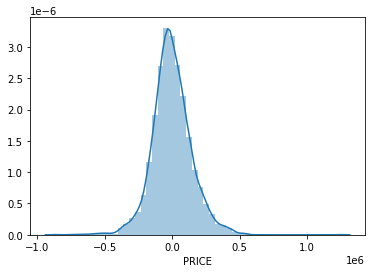

In [76]:
# Residuals Histogram -Linear Regression
sns.distplot((y_test-pred_test), bins = 50)

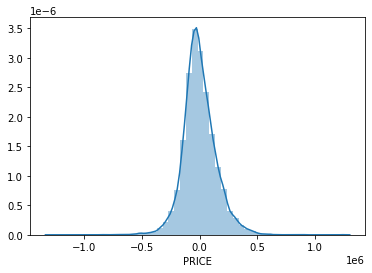

In [77]:
# Residuals Histogram -Linear Regression
sns.distplot((y_train-pred_train), bins = 50)

In [78]:
# Lasso Regression
model = Lasso(random_state=1)
model.fit(X_train, y_train)
# evaluate the model
pred_test= model.predict(X_test)
# evaluate predictions on Test
mae = mean_absolute_error(y_test, pred_test)
print('MAE Test: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_test, pred_test))
print('RMSE Test: %.3f' % rmse)

pred_train = model.predict(X_train)
# evaluate predictions on Train
mae = mean_absolute_error(y_train, pred_train)
print('MAE Train: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print('RMSE Train: %.3f' % rmse)

MAE Test: 109470.744
RMSE Test: 146137.129
MAE Train: 107005.954
RMSE Train: 143628.635


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221658960879171.28, tolerance: 237228362208.31326
  positive)


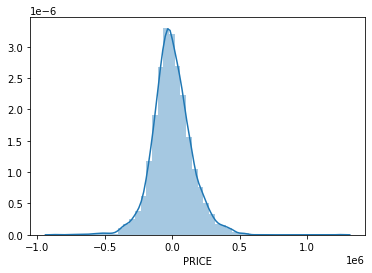

In [79]:
# Residuals Histogram -Lasso
sns.distplot((y_test-pred_test), bins = 50)

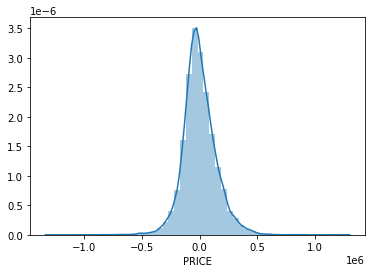

In [80]:
# Residuals Histogram -Lasso
sns.distplot((y_train-pred_train), bins = 50)

In [81]:
# Ridge Regression
model = Ridge(random_state=1)
model.fit(X_train, y_train)
# evaluate the model
pred_test= model.predict(X_test)
# evaluate predictions on Test
mae = mean_absolute_error(y_test, pred_test)
print('MAE Test: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_test, pred_test))
print('RMSE Test: %.3f' % rmse)

pred_train = model.predict(X_train)
# evaluate predictions on Train
mae = mean_absolute_error(y_train, pred_train)
print('MAE Train: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print('RMSE Train: %.3f' % rmse)

MAE Test: 109424.669
RMSE Test: 146092.861
MAE Train: 107001.654
RMSE Train: 143639.008


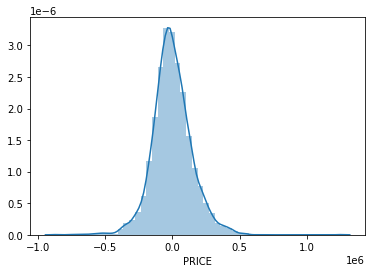

In [82]:
# Residuals Histogram -Ridge
sns.distplot((y_test-pred_test), bins = 50)

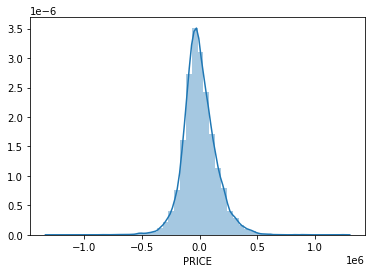

In [83]:
# Residuals Histogram -Ridge
sns.distplot((y_train-pred_train), bins = 50)

In [84]:
from sklearn.tree import DecisionTreeRegressor

# Decision tree
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
# evaluate the model
pred_test= model.predict(X_test)
# evaluate predictions on Test
mae = mean_absolute_error(y_test, pred_test)
print('MAE Test: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_test, pred_test))
print('RMSE Test: %.3f' % rmse)

pred_train = model.predict(X_train)
# evaluate predictions on Train
mae = mean_absolute_error(y_train, pred_train)
print('MAE Train: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print('RMSE Train: %.3f' % rmse)

MAE Test: 106194.375
RMSE Test: 156124.704
MAE Train: 0.000
RMSE Train: 0.000


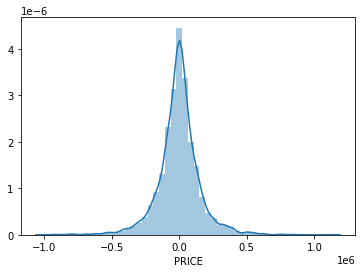

In [85]:
# Residuals Histogram -DT
sns.distplot((y_test-pred_test), bins = 50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


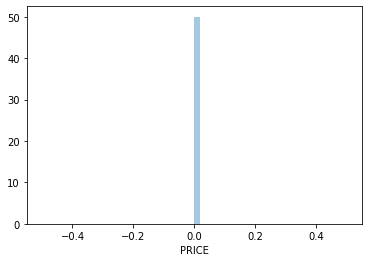

In [86]:
# Residuals Histogram -Decision Tree
sns.distplot((y_train-pred_train), bins = 50)

In [64]:
# Random Forest Mdoel
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
# evaluate the model
pred_test= model.predict(X_test)
# evaluate predictions on Test
mae = mean_absolute_error(y_test, pred_test)
print('MAE Test: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_test, pred_test))
print('RMSE Test: %.3f' % rmse)

pred_train = model.predict(X_train)
# evaluate predictions on Train
mae = mean_absolute_error(y_train, pred_train)
print('MAE Train: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print('RMSE Train: %.3f' % rmse)

# MAE Test: 71022.591
# RMSE Test: 107659.052

# MAE Test: 70959.607
# RMSE Test: 107383.166


MAE Test: 71188.091
RMSE Test: 107980.758
MAE Train: 26718.836
RMSE Train: 40970.464


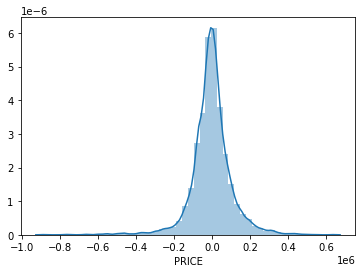

In [65]:
# Residuals Histogram -RF
sns.distplot((y_test-pred_test), bins = 50)

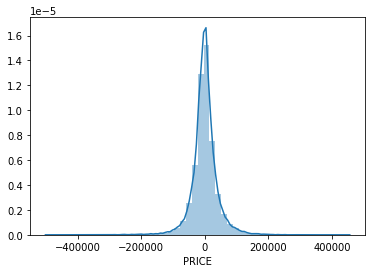

In [66]:
# Residuals Histogram -RF
sns.distplot((y_train-pred_train), bins = 50)

In [67]:
### Feature Selection from RandomForest-

feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

SQUARE                   2.914334e-01
SALEDATE                 2.667391e-01
GBA                      1.137316e-01
LONGITUDE                7.044589e-02
EYB                      4.787321e-02
                             ...     
STYLE_Bi-Level           9.814166e-08
ROOF_Wood- FS            8.481731e-08
STYLE_3.5 Story Unfin    4.467352e-08
STYLE_4.5 Story Unfin    1.510367e-08
GRADE_Exceptional-C      0.000000e+00
Length: 163, dtype: float64

In [74]:
X.columns

Index(['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL',
       'EYB', 'STORIES', 'SALE_NUM',
       ...
       'WARD_Ward 3', 'WARD_Ward 4', 'WARD_Ward 5', 'WARD_Ward 6',
       'WARD_Ward 7', 'WARD_Ward 8', 'QUADRANT_NE', 'QUADRANT_NW',
       'QUADRANT_SE', 'QUADRANT_SW'],
      dtype='object', length=163)

In [68]:
feature_imp_df = pd.DataFrame(feature_imp)
feature_imp_df.head(10)

,0
SQUARE,0.291433
SALEDATE,0.266739
GBA,0.113732
LONGITUDE,0.070446
EYB,0.047873
ZIPCODE,0.023392
LATITUDE,0.020079
QUALIFIED_le,0.019442
SALE_NUM,0.017608
BATHRM,0.015390


In [74]:
feature_imp_df.head(60)

,Score
SQUARE,0.291433
SALEDATE,0.266739
GBA,0.113732
LONGITUDE,0.070446
EYB,0.047873
ZIPCODE,0.023392
LATITUDE,0.020079
QUALIFIED_le,0.019442
SALE_NUM,0.017608
BATHRM,0.015390


In [73]:
feature_imp_df.columns =['Score']

In [70]:
feature_imp[feature_imp>0.001].nunique()

27

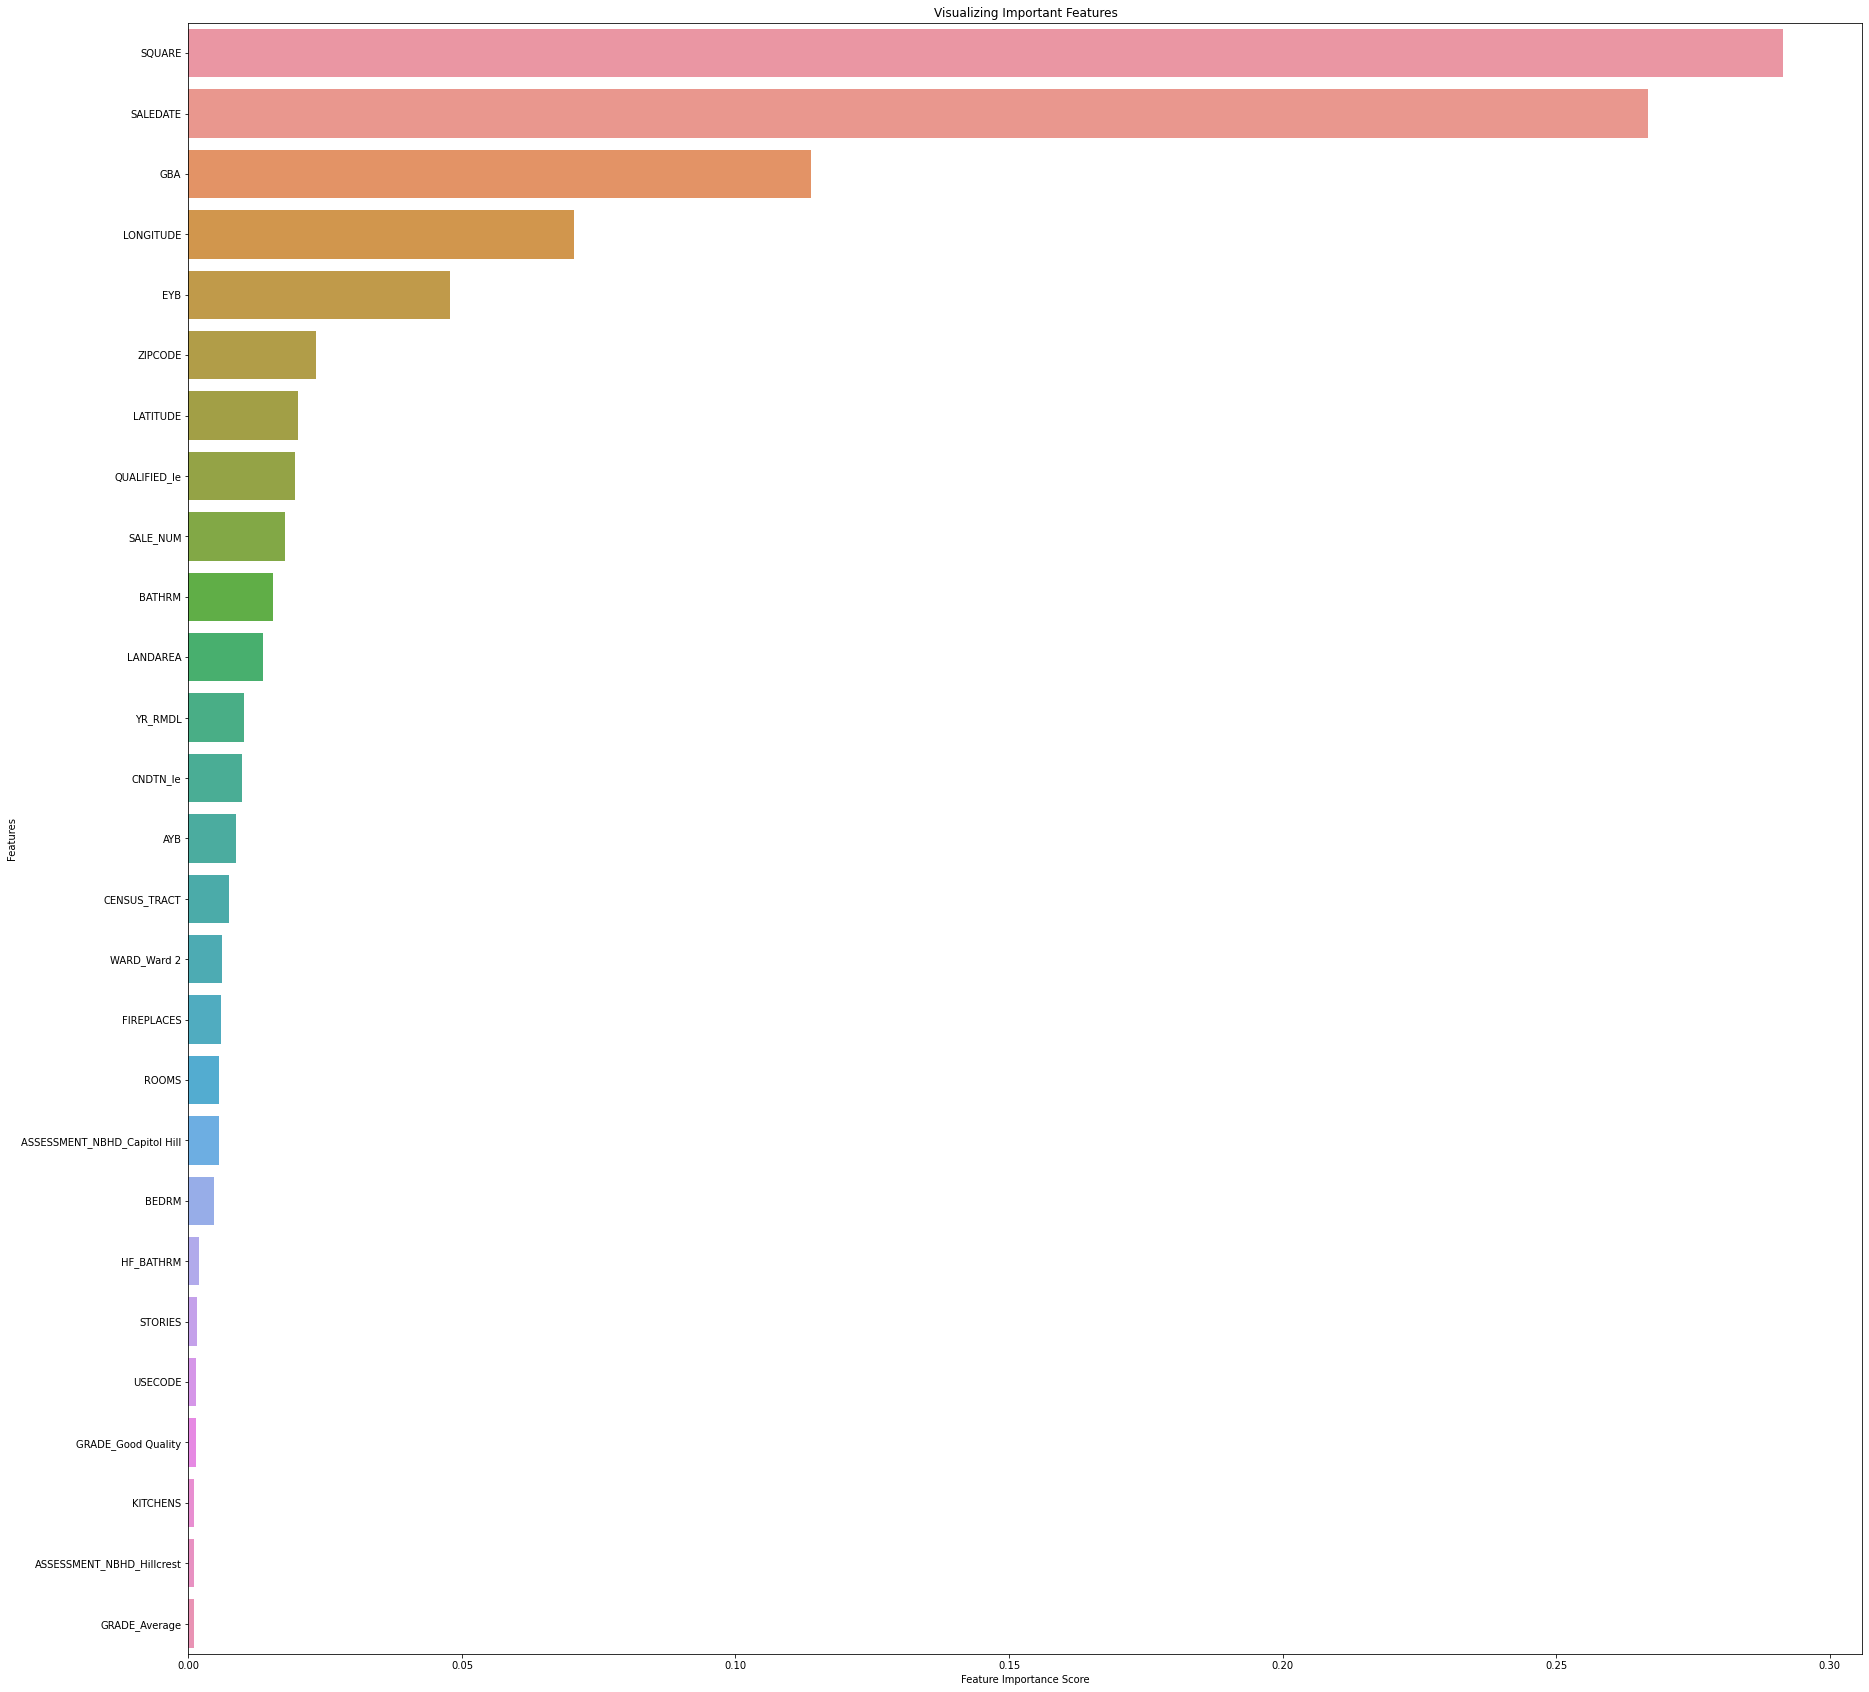

In [67]:
plt.figure(figsize=(30,30))
sns.barplot(x=feature_imp[feature_imp>0.001], y=feature_imp[feature_imp>0.001].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [68]:
X_train_fs = X_train.copy()
y_train_fs = y_train.copy()
X_test_fs = X_test.copy()
y_test_fs = y_test.copy()

In [64]:
X_train_fs

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
15313,1.840748,-1.10716,0.693147,-0.057817,0.651583,0.569746,0.048445,-1.155130,0.474112,0.216831,...,0,1,0,0,0,0,0,1,0,0
8130,-1.314226,-1.10716,0.693147,-0.615781,-0.296569,-0.694322,0.080176,-0.847609,-0.166106,-0.690057,...,0,0,0,1,0,0,0,0,1,0
23676,-0.262568,0.63281,0.693147,-2.021739,-1.518950,1.552910,0.127713,-0.335075,-0.166106,-0.690057,...,0,0,0,1,0,0,1,0,0,0
389,-0.262568,0.63281,0.693147,-1.259904,0.651583,-1.068861,0.032568,-0.130061,-0.166106,-0.690057,...,0,0,0,1,0,0,0,1,0,0
25456,-1.314226,0.63281,0.693147,-0.057817,-0.296569,0.850650,-0.015112,-1.462651,-0.166106,-0.690057,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,-0.262568,0.63281,0.693147,-0.615781,-0.296569,0.757016,-0.142607,0.074953,-0.166106,1.767166,...,1,0,0,0,0,0,0,1,0,0
18674,-0.262568,0.63281,0.693147,-0.057817,0.651583,0.663381,-0.015112,-0.130061,-0.166106,-0.690057,...,0,1,0,0,0,0,0,1,0,0
5454,-1.314226,0.63281,0.693147,-0.057817,-0.296569,0.803833,-0.318749,-0.847609,-0.166106,-0.690057,...,0,0,0,1,0,0,1,0,0,0
13403,0.789090,0.63281,0.693147,-0.057817,-0.296569,0.101573,0.143543,0.074953,-0.166106,-0.690057,...,0,0,0,0,0,0,0,1,0,0


In [65]:
y_train_fs

15313     680000
8130      239500
23676     240000
389       900000
25456     210000
          ...   
12081     800500
18674     650000
5454      660000
13403    1025000
284       415000
Name: PRICE, Length: 22005, dtype: int64

In [69]:
from sklearn.feature_selection import SelectFromModel

feat_sel = SelectFromModel(model, threshold=0.001)
feat_sel.fit(X_train_fs, y_train_fs)

SelectFromModel(estimator=RandomForestRegressor(random_state=1),
                threshold=0.001)

In [70]:
X_imp_train = feat_sel.transform(X_train_fs)
X_imp_test = feat_sel.transform(X_test_fs)

In [71]:
model = RandomForestRegressor(random_state=1)
model.fit(X_imp_train, y_train_fs)

# evaluate the model
pred_test= model.predict(X_imp_test)
# evaluate predictions on Test
mae = mean_absolute_error(y_test_fs, pred_test)
print('MAE Test: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_test_fs, pred_test))
print('RMSE Test: %.3f' % rmse)

pred_train = model.predict(X_imp_train)
# evaluate predictions on Train
mae = mean_absolute_error(y_train_fs, pred_train)
print('MAE Train: %.3f' % mae)
rmse = sqrt(mean_squared_error(y_train_fs, pred_train))
print('RMSE Train: %.3f' % rmse)

MAE Test: 70959.607
RMSE Test: 107383.166
MAE Train: 26666.258
RMSE Train: 40947.505


In [67]:
X_imp_train

array([[ 1.84074751, -1.10715984, -0.05781692, ...,  0.        ,
         0.        ,  0.        ],
       [-1.31422566, -1.10715984, -0.61578117, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26256794,  0.63280961, -2.02173879, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.31422566,  0.63280961, -0.05781692, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78908978,  0.63280961, -0.05781692, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78908978, -1.10715984, -0.05781692, ...,  0.        ,
         0.        ,  1.        ]])

In [72]:
X_train_new = X_imp_train
X_test_new = X_imp_test
# X_train_new, X_test_new, y_train_fs, y_test_fs

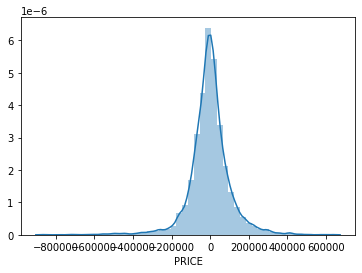

In [73]:
# Residuals Histogram -RF
sns.distplot((y_test_fs-pred_test), bins = 50)

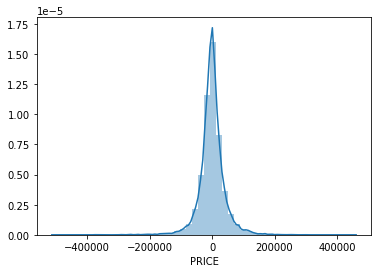

In [70]:
# Residuals Histogram -RF
sns.distplot((y_train_fs-pred_train), bins = 50)

In [74]:
### Hyperparameter Optimization for RandomizedSearchCV-
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse', 'mae']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [83]:
X_tr_500 = pd.DataFrame(X_train_new)

In [84]:
y_tr_500 = y_train_fs

In [86]:
X_tr_500

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.840748,-1.10716,-0.057817,0.651583,0.569746,0.048445,-1.155130,0.474112,0.216831,0.714269,...,1804.0,0.030157,1.111022,1.0,3.0,0.0,0.0,0.0,0.0,0.0
1,-1.314226,-1.10716,-0.615781,-0.296569,-0.694322,0.080176,-0.847609,-0.166106,-0.690057,0.413427,...,6802.0,-0.968280,-1.570289,1.0,3.0,0.0,1.0,0.0,0.0,0.0
2,-0.262568,0.63281,-2.021739,-1.518950,1.552910,0.127713,-0.335075,-0.166106,-0.690057,-1.459143,...,7901.0,1.036760,0.322401,1.0,3.0,1.0,0.0,0.0,0.0,0.0
3,-0.262568,0.63281,-1.259904,0.651583,-1.068861,0.032568,-0.130061,-0.166106,-0.690057,1.063774,...,4901.0,-1.350276,0.322401,1.0,4.0,0.0,0.0,0.0,0.0,0.0
4,-1.314226,0.63281,-0.057817,-0.296569,0.850650,-0.015112,-1.462651,-0.166106,-0.690057,-0.688713,...,7808.0,1.462496,-0.939392,1.0,3.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,-0.262568,0.63281,-0.615781,-0.296569,0.757016,-0.142607,0.074953,-0.166106,1.767166,0.081517,...,1402.0,-0.435236,0.637849,1.0,4.0,0.0,1.0,0.0,0.0,0.0
22001,-0.262568,0.63281,-0.057817,0.651583,0.663381,-0.015112,-0.130061,-0.166106,-0.690057,0.996014,...,10300.0,0.253523,-0.939392,1.0,5.0,0.0,0.0,0.0,0.0,0.0
22002,-1.314226,0.63281,-0.057817,-0.296569,0.803833,-0.318749,-0.847609,-0.166106,-0.690057,-0.379154,...,8100.0,-1.032432,0.164677,1.0,4.0,0.0,1.0,0.0,0.0,0.0
22003,0.789090,0.63281,-0.057817,-0.296569,0.101573,0.143543,0.074953,-0.166106,-0.690057,1.023819,...,2702.0,-0.076568,0.480125,1.0,4.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# from joblib import parallel_backend
# X_train_new, X_test_new, y_train_fs, y_test_fs
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,
                                   random_state=1,n_jobs=-1)
    ### fit the randomized model
rf_randomcv.fit(X_tr_500,y_tr_500)

In [ ]:
data_temp.PRICE.describe()

count    26444.000000
mean        13.094222
std          0.609038
min         11.515293
25%         12.676079
50%         13.190024
75%         13.554147
max         14.220643
Name: PRICE, dtype: float64